<p style="background-color:darkgrey; font-family:calibri; color:white; font-size:250%; text-align:center; border-radius:50px 50px; padding-top:10px; padding-bottom:10px;">1. Business Understanding</p>

#### Fenomena gempa bumi merupakan salah satu bencana alam yang paling sulit diprediksi secara akurat, namun dampaknya dapat menyebabkan kerugian besar, baik dalam hal korban jiwa maupun kerusakan infrastruktur. Pemerintah dan lembaga terkait telah berupaya melakukan mitigasi dengan memantau aktivitas seismik dan gejala awal yang mungkin mendahului gempa. Berdasarkan hasil wawancara, jurnal penelitian, serta observasi pada Badan Meteorologi, Klimatologi, dan Geofisika (BMKG), terdapat tantangan signifikan dalam mendeteksi pola-pola geofisika yang menjadi indikator potensi gempa. Banyak kasus aktivitas seismik yang tidak terdeteksi secara dini atau kurangnya analisis data menyebabkan keterlambatan dalam memberikan peringatan kepada masyarakat. Oleh karena itu, penulis mencoba mengambil pendekatan berbasis teknologi dengan menggunakan pembelajaran mesin, penambangan data, dan kecerdasan buatan untuk menganalisis parameter geofisika yang relevan. Tujuannya adalah untuk mengembangkan sistem prediktif yang dapat mendeteksi kemungkinan terjadinya gempa berdasarkan gejala awal, sehingga dapat membantu mengurangi risiko dan meningkatkan kesiapsiagaan masyarakat terhadap ancaman gempa bumi.

<p style="background-color:darkgrey; font-family:calibri; color:white; font-size:250%; text-align:center; border-radius:50px 50px; padding-top:10px; padding-bottom:10px;">2. Data Understanding</p>

In [1]:

import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns  
from skimpy import skim # I
from summarytools import dfSummary 


from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder  
from imblearn.over_sampling import SMOTE  


from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVC  
from sklearn.neighbors import KNeighborsClassifier  


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
from sklearn.metrics import roc_curve, auc  


%matplotlib inline

In [2]:
# Memuat dataset
df = pd.read_csv('gempa_dataset.csv')  

In [3]:
dfSummary(df)  # Menampilkan ringkasan data

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Gempa Kecil[object],1. Yes2. No,"1,115 (50.2%)1,107 (49.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAThJREFUeJzt201KA0EUhdFqaUQnCSGQxWQRLtZFZDdBkoGKk5ZyBakn3NB6ziCjNF0UH50f6k3LsjRImFprz621x8jd/pavZVk+7r2INZn3+/3LZrPZ3Xsha3O9Xt+maXoV3O3mHtrxePzYbrefA9f9a5fL5el0Ou3O53P/RBDbjeb+0kM7HA7vt17Ej/71gwEPI2+G3xAbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNrLn2fphwNwt189+1cz9eHM/deow4Ji+b30O4d7rWBMDL3UGXgZNRvlI8WSr8VQrMMpXYIyvxijfIGN8dUb5avxyL/CnLjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaMUb5B9qrOKF+BMb4aAy81Bl7auG8KW2rftPMH+wAAAABJRU5ErkJggg=="">",0(0.0%)
2,Interval Waktu Antar Gempa[object],1. No2. Yes,"1,131 (50.9%)1,091 (49.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATpJREFUeJzt2z1qw0AURtFRECFpJIzBi/EistgsQrsRwS7ikEZhynQaCT5jc07hykLDcJF/mNcty1IgoSulvJdSXiN3ez6/y7Lc7r2IR9Efj8ePYRgO917II7per19d130Kbp2+hnY+n2/jOP6svIZSyuVyeZum6TDPc/1UENsKfX2poZ1Op+81F/BP/QrCSi9r3wh7iY0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEb2fNs9SBg7pbPwZ616+vR5nri1EHAdnXv6hzCvdfxKAy87GPgpUFnlI8UT7Z2nmYbGeVrZHxvO6N8DYzv7WOUr51f7Rv5U5cYsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjxihfA/u0j1G+Rsb3tjPw0s7AS9nmDwpbat+pwYsUAAAAAElFTkSuQmCC"">",0(0.0%)
3,Kedalaman Hiposenter Dangkal[object],1. Yes2. No,"1,149 (51.7%)1,073 (48.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATtJREFUeJzt201Kw1AAhdEXCaKThlLoYroIF+siupsg6cCKk8ibORCa9MktLecMHAUawkd/5N1unucCCV0p5bWU8hx5tcf0Pc/z+dY3cQ/63W73ttlstre+kXt1Op0+uq57F9xlfQ3tcDich2H4WnA9v0zT9HI8HrfjONZPBrFd0Nc/NbT9fv956WL+VL+GsMDTkovgP4iNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRG9nzbPUQYO4lH4fntk5fjzXX06YOAV6nPr+6Q7j1fdwDg5d2Bi8LdaZ8pHhnW8e7WANTvhXM9tqY8i1kttfOlG8dv9gb+KcuMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERowp30KeUTtTvhXM9toYvKxj8FKu9wMKW2rfyd3U/wAAAABJRU5ErkJggg=="">",0(0.0%)
4,Keberadaan Patahan Aktif[object],1. Yes2. No,"1,118 (50.3%)1,104 (49.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAThJREFUeJzt201KA0EUhdFqaUQnCSGQxWQRLtZFZDdBkoGKk5ZyBakn3NB6ziCjNF0UH50f6k3LsjRImFprz621x8jd/pavZVk+7r2INZn3+/3LZrPZ3Xsha3O9Xt+maXoV3O3mHtrxePzYbrefA9f9a5fL5el0Ou3O53P/RBDbjeb+0kM7HA7vt17Ej/71gwEPI2+G3xAbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNrLn2fphwNwt189+1cz9eHM/deow4Ji+b30O4d7rWBMDL3UGXgZNRvlI8WSr8VQrMMpXYIyvxijfIGN8dUb5avxyL/CnLjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaMUb5B9qrOKF+BMb4aAy81Bl7auG8KW2rftPMH+wAAAABJRU5ErkJggg=="">",0(0.0%)
5,Gerakan Lempeng Signifikan[object],1. No2. Yes,"1,142 (51.4%)1,080 (48.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATtJREFUeJzt201Kw1AAhdEXCaKThlLoYroIF+siupsg6cCKk8ibORCa9MktLecMHAUawkd/5N1unucCCV0p5bWU8hx5tcf0Pc/z+dY3cQ/63W73ttlstre+kXt1Op0+uq57F9xlfQ3tcDich2H4WnA9v0zT9HI8HrfjONZPBrFd0Nc/NbT9fv956WL+VL+GsMDTkovgP4iNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRG9nzbPUQYO4lH4fntk5fjzXX06YOAV6nPr+6Q7j1fdwDg5d2Bi8LdaZ8pHhnW8e7WANTvhXM9tqY8i1kttfOlG8dv9gb+KcuMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERowp30KeUTtTvhXM9toYvKxj8FKu9wMKW2rfyd3U/wAAAABJRU5ErkJggg=="">",0(0.0%)
6,Perubahan Permukaan Tanah[object],1. No2. Yes,"1,124 (50.6%)1,098 (49.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8

In [4]:
# Menampilkan semua baris
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2222   │ │ string      │ 22    │                                                          │
│ │ Number of columns │ 22     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column          ┃ NA ┃ NA % ┃ shortest ┃ longest ┃ min ┃ max ┃ chars per row ┃ words per row ┃ total words ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ Gempa Kecil     │  0 │    0 │ No       │ Yes     │ No  │ Yes │           2.5 │             1 │        2222 │  │
│ │ Interval Waktu  │  0 │    0 │ No       │ Yes     │ No  │ Yes │          2.49 │             1 │        2222 │  │
│ │ Antar Gempa     │    │      │          │         │     │     │               │               │             │  │
│ │ Kedalaman       │  0 │    0 │ No       │ Yes     │ No  │ Yes │          2.52 │             1 │        2222 │  │
│ │ Hiposenter      │    │      │          │         │     │     │               │               │             │  │
│ │ Dangkal         │    │      │          │         │     │     │               │               │             │  │
│ │ Keberadaan      │  0 │    0 │ No       │ Yes     │ No  │ Yes │           2.5 │             1 │        2222 │  │
│ │ Patahan Aktif   │    │      │          │         │     │     │               │               │             │  │
│ │ Gerakan Lempeng │  0 │    0 │ No       │ Yes     │ No  │ Yes │          2.49 │             1 │        2222 │  │
│ │ Signifikan      │    │      │          │         │     │     │               │               │             │  │
│ │ Perubahan       │  0 │    0 │ No       │ Yes     │ No  │ Yes │          2.49 │             1 │        2222 │  │
│ │ Permukaan Tanah │    │      │          │         │     │     │               │               │             │  │
│ │ Aktivitas       │  0 │    0 │ No       │ Yes     │ No  │ Yes │          2.49 │             1 │        2222 │  │
│ │ Vulkanik        │    │      │          │         │     │     │               │               │             │  │
│ │ Suhu Bawah      │  0 │    0 │ No       │ Yes     │ No  │ Yes │          2.49 │             1 │        2222 │  │
│ │ Tanah Meningkat │    │      │          │         │     │     │               │               │             │  │
│ │ Adanya Tekanan  │  0 │    0 │ No       │ Yes     │ No  │ Yes │           2.5 │             1 │        2222 │  │
│ │ Tektonik Tinggi │    │      │          │         │     │     │               │               │             │  │
│ │ Gempa           │  0 │    0 │ No       │ Yes     │ No  │ Yes │           2.5 │             1 │        2222 │  │
│ │ Pendahuluan     │    │      │          │         │     │     │               │               │             │  │
│ │ Gempa Susulan   │  0 │    0 │ No       │ Yes     │ No  │ Yes │           2.5 │             1 │        2222 │  │
│ │ Keberadaan Gas  │  0 │    0 │ No       │ Yes     │ No  │ Yes │          2.49 │             1 │        2222 │  │
│ │ Radon di Air    │    │      │          │         │  

In [5]:
# Melihat dimensi data
print("Dimensi data:", df.shape)

Dimensi data: (2222, 22)


In [6]:
# Menampilkan beberapa baris pertama data
print("Baris pertama data:")
df.head()

Baris pertama data:


,Gempa Kecil,Interval Waktu Antar Gempa,Kedalaman Hiposenter Dangkal,Keberadaan Patahan Aktif,Gerakan Lempeng Signifikan,Perubahan Permukaan Tanah,Aktivitas Vulkanik,Suhu Bawah Tanah Meningkat,Adanya Tekanan Tektonik Tinggi,Gempa Pendahuluan,...,Perubahan Pola Cuaca Lokal,Peningkatan Aktivitas Seismograf,Keberadaan Retakan Tanah Baru,Adanya Pergerakan Tanah,Keberadaan Sumber Air Panas Baru,Riwayat Gempa Besar di Wilayah Tersebut,Bangunan Tahan Gempa,Edukasi Mitigasi Gempa,Adanya Aktivitas Geotermal,Prediksi Gempa
0,No,No,Yes,No,No,Yes,No,No,No,Yes,...,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No
1,Yes,Yes,No,No,No,No,No,No,Yes,No,...,No,No,No,Yes,No,No,Yes,No,Yes,No
2,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,...,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No
3,Yes,No,No,No,Yes,Yes,Yes,No,No,Yes,...,Yes,No,No,No,Yes,No,No,Yes,No,No
4,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No


In [7]:
# Menampilkan beberapa baris terakhir data
print("Baris terakhir data:")
df.tail()

Baris terakhir data:


,Gempa Kecil,Interval Waktu Antar Gempa,Kedalaman Hiposenter Dangkal,Keberadaan Patahan Aktif,Gerakan Lempeng Signifikan,Perubahan Permukaan Tanah,Aktivitas Vulkanik,Suhu Bawah Tanah Meningkat,Adanya Tekanan Tektonik Tinggi,Gempa Pendahuluan,...,Perubahan Pola Cuaca Lokal,Peningkatan Aktivitas Seismograf,Keberadaan Retakan Tanah Baru,Adanya Pergerakan Tanah,Keberadaan Sumber Air Panas Baru,Riwayat Gempa Besar di Wilayah Tersebut,Bangunan Tahan Gempa,Edukasi Mitigasi Gempa,Adanya Aktivitas Geotermal,Prediksi Gempa
2217,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,Yes,No,No,No,No,No
2218,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,...,No,No,No,Yes,Yes,No,Yes,No,Yes,No
2219,No,Yes,Yes,No,No,Yes,No,No,No,No,...,Yes,Yes,Yes,No,Yes,No,No,Yes,No,No
2220,No,No,No,No,Yes,No,No,No,No,No,...,Yes,No,No,Yes,Yes,Yes,No,Yes,No,No
2221,No,No,Yes,No,No,No,No,No,No,Yes,...,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No


In [8]:
# Mengecek tipe data dari setiap kolom
print("Tipe data setiap kolom:")
df.dtypes

Tipe data setiap kolom:


Gempa Kecil                                object
Interval Waktu Antar Gempa                 object
Kedalaman Hiposenter Dangkal               object
Keberadaan Patahan Aktif                   object
Gerakan Lempeng Signifikan                 object
Perubahan Permukaan Tanah                  object
Aktivitas Vulkanik                         object
Suhu Bawah Tanah Meningkat                 object
Adanya Tekanan Tektonik Tinggi             object
Gempa Pendahuluan                          object
Gempa Susulan                              object
Keberadaan Gas Radon di Air                object
Perubahan Pola Cuaca Lokal                 object
Peningkatan Aktivitas Seismograf           object
Keberadaan Retakan Tanah Baru              object
Adanya Pergerakan Tanah                    object
Keberadaan Sumber Air Panas Baru           object
Riwayat Gempa Besar di Wilayah Tersebut    object
Bangunan Tahan Gempa                       object
Edukasi Mitigasi Gempa                     object


In [9]:
# Menghitung statistik deskriptif untuk kolom numerik
print("Statistik deskriptif untuk kolom numerik:")
df.describe()

Statistik deskriptif untuk kolom numerik:


,Gempa Kecil,Interval Waktu Antar Gempa,Kedalaman Hiposenter Dangkal,Keberadaan Patahan Aktif,Gerakan Lempeng Signifikan,Perubahan Permukaan Tanah,Aktivitas Vulkanik,Suhu Bawah Tanah Meningkat,Adanya Tekanan Tektonik Tinggi,Gempa Pendahuluan,...,Perubahan Pola Cuaca Lokal,Peningkatan Aktivitas Seismograf,Keberadaan Retakan Tanah Baru,Adanya Pergerakan Tanah,Keberadaan Sumber Air Panas Baru,Riwayat Gempa Besar di Wilayah Tersebut,Bangunan Tahan Gempa,Edukasi Mitigasi Gempa,Adanya Aktivitas Geotermal,Prediksi Gempa
count,2222,2222,2222,2222,2222,2222,2222,2222,2222,2222,...,2222,2222,2222,2222,2222,2222,2222,2222,2222,2222
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Yes,No,Yes,Yes,No,No,No,No,Yes,Yes,...,Yes,No,Yes,Yes,Yes,No,Yes,No,No,No
freq,1115,1131,1149,1118,1142,1124,1139,1124,1112,1120,...,1145,1112,1117,1127,1122,1134,1145,1134,1120,1944


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Gempa Kecil                              2222 non-null   object
 1   Interval Waktu Antar Gempa               2222 non-null   object
 2   Kedalaman Hiposenter Dangkal             2222 non-null   object
 3   Keberadaan Patahan Aktif                 2222 non-null   object
 4   Gerakan Lempeng Signifikan               2222 non-null   object
 5   Perubahan Permukaan Tanah                2222 non-null   object
 6   Aktivitas Vulkanik                       2222 non-null   object
 7   Suhu Bawah Tanah Meningkat               2222 non-null   object
 8   Adanya Tekanan Tektonik Tinggi           2222 non-null   object
 9   Gempa Pendahuluan                        2222 non-null   object
 10  Gempa Susulan                            2222 non-null   obj

In [11]:
print(df.describe())

       Gempa Kecil Interval Waktu Antar Gempa Kedalaman Hiposenter Dangkal  \
count         2222                       2222                         2222   
unique           2                          2                            2   
top            Yes                         No                          Yes   
freq          1115                       1131                         1149   

       Keberadaan Patahan Aktif Gerakan Lempeng Signifikan  \
count                      2222                       2222   
unique                        2                          2   
top                         Yes                         No   
freq                       1118                       1142   

       Perubahan Permukaan Tanah Aktivitas Vulkanik  \
count                       2222               2222   
unique                         2                  2   
top                           No                 No   
freq                        1124               1139   

       Suhu Bawah Tana

<p style="background-color:darkgrey; font-family:calibri; color:white; font-size:250%; text-align:center; border-radius:50px 50px; padding-top:10px; padding-bottom:10px;">3. Data Preparation</p>

In [12]:
# Mengecek nilai yang hilang (missing values) di setiap kolom
print("Nilai yang hilang di setiap kolom:")
df.isnull().sum()

Nilai yang hilang di setiap kolom:


Gempa Kecil                                0
Interval Waktu Antar Gempa                 0
Kedalaman Hiposenter Dangkal               0
Keberadaan Patahan Aktif                   0
Gerakan Lempeng Signifikan                 0
Perubahan Permukaan Tanah                  0
Aktivitas Vulkanik                         0
Suhu Bawah Tanah Meningkat                 0
Adanya Tekanan Tektonik Tinggi             0
Gempa Pendahuluan                          0
Gempa Susulan                              0
Keberadaan Gas Radon di Air                0
Perubahan Pola Cuaca Lokal                 0
Peningkatan Aktivitas Seismograf           0
Keberadaan Retakan Tanah Baru              0
Adanya Pergerakan Tanah                    0
Keberadaan Sumber Air Panas Baru           0
Riwayat Gempa Besar di Wilayah Tersebut    0
Bangunan Tahan Gempa                       0
Edukasi Mitigasi Gempa                     0
Adanya Aktivitas Geotermal                 0
Prediksi Gempa                             0
dtype: int

In [13]:
# # Langkah 1: Menangani Missing Values
# # Mengisi nilai yang hilang dengan mean untuk kolom numerik dan mode untuk kolom kategorikal
# for column in df.select_dtypes(include=[np.number]).columns:
#     df[column].fillna(df[column].mean(), inplace=True)

# for column in df.select_dtypes(include=[object]).columns:
#     df[column].fillna(df[column].mode()[0], inplace=True)

In [14]:
# Langkah 2: Feature Selection yaitu Menghapus kolom tertentu
columns_to_drop = ['Edukasi Mitigasi Gempa', 'Adanya Aktivitas Geotermal']
df = df.drop(columns=columns_to_drop)

In [15]:
df

,Gempa Kecil,Interval Waktu Antar Gempa,Kedalaman Hiposenter Dangkal,Keberadaan Patahan Aktif,Gerakan Lempeng Signifikan,Perubahan Permukaan Tanah,Aktivitas Vulkanik,Suhu Bawah Tanah Meningkat,Adanya Tekanan Tektonik Tinggi,Gempa Pendahuluan,Gempa Susulan,Keberadaan Gas Radon di Air,Perubahan Pola Cuaca Lokal,Peningkatan Aktivitas Seismograf,Keberadaan Retakan Tanah Baru,Adanya Pergerakan Tanah,Keberadaan Sumber Air Panas Baru,Riwayat Gempa Besar di Wilayah Tersebut,Bangunan Tahan Gempa,Prediksi Gempa
0,No,No,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,Yes,No,No,Yes,Yes,Yes,No
1,Yes,Yes,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Yes,No
2,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,No,No,Yes,Yes,Yes,No
3,Yes,No,No,No,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Yes,No,No,No
4,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2217,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No
2218,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,No,Yes,Yes,No,Yes,No
2219,No,Yes,Yes,No,No,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,No,Yes,No,No,No
2220,No,No,No,No,Yes,No,No,No,No,No,Yes,No,Yes,No,No,Yes,Yes,Yes,No,No


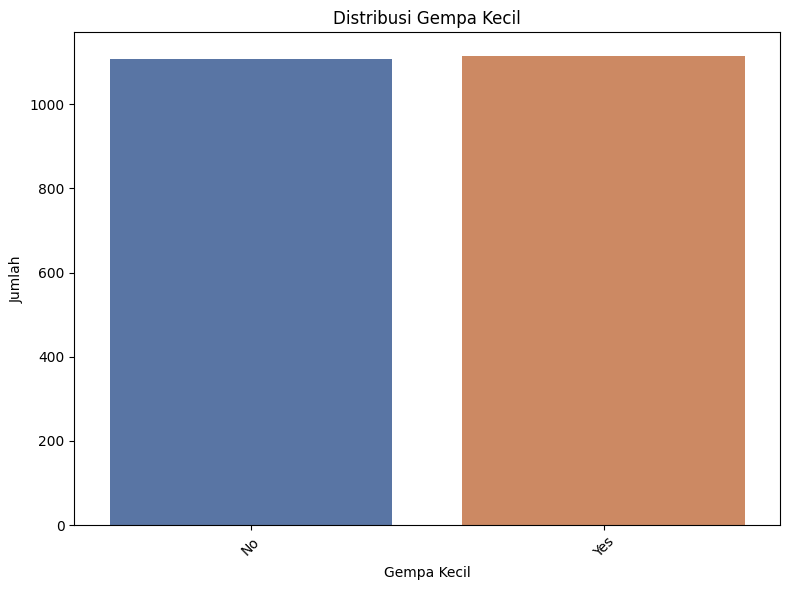

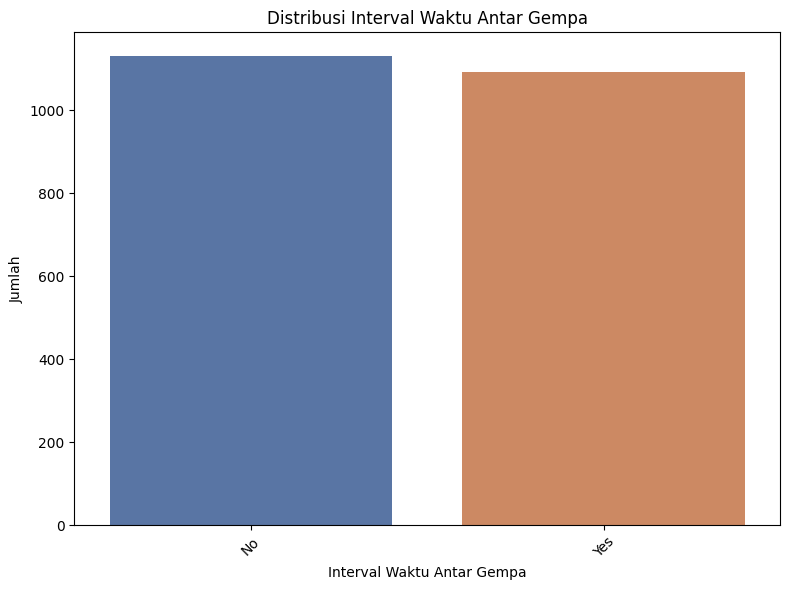

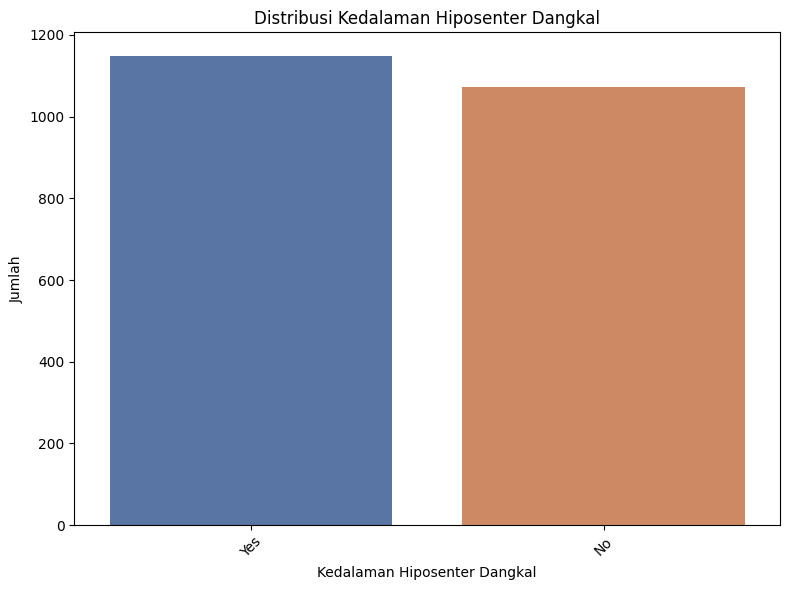

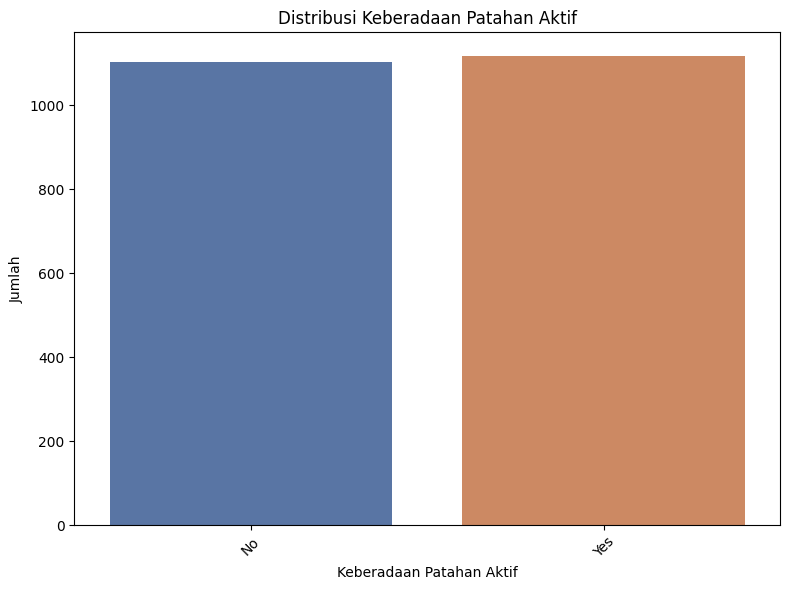

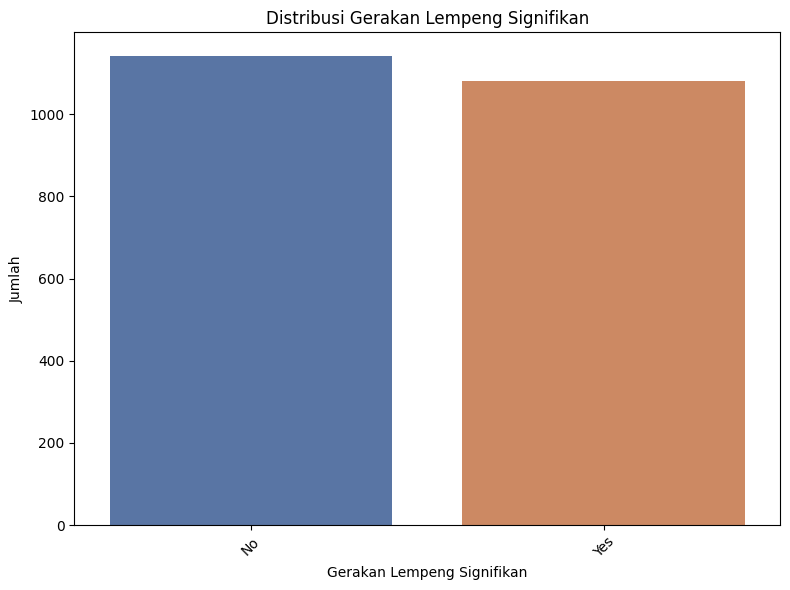

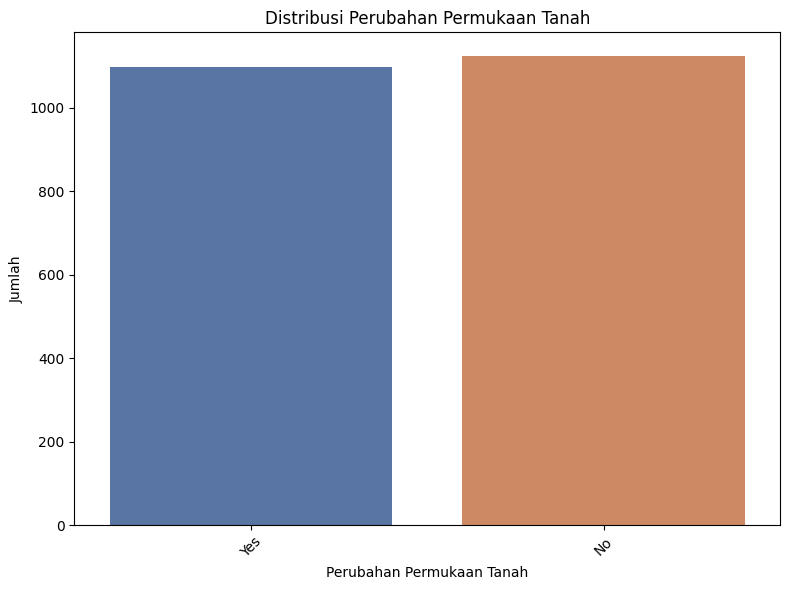

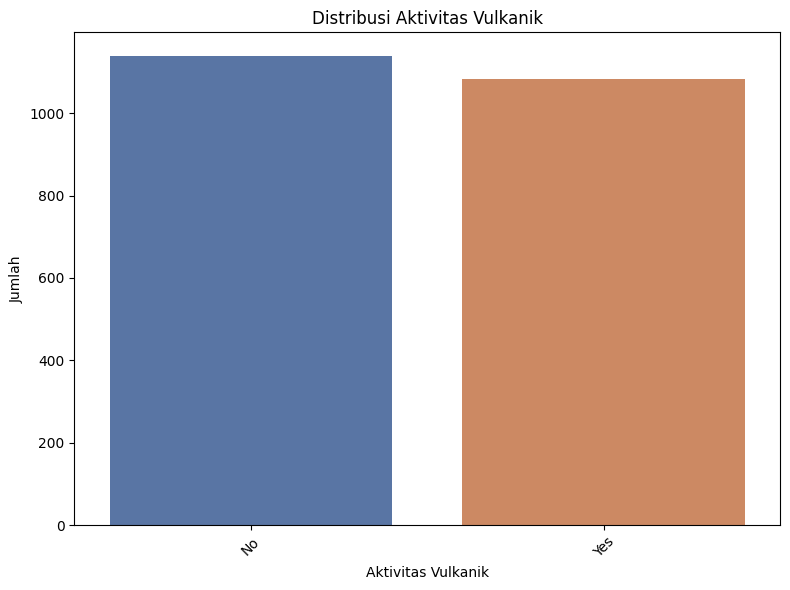

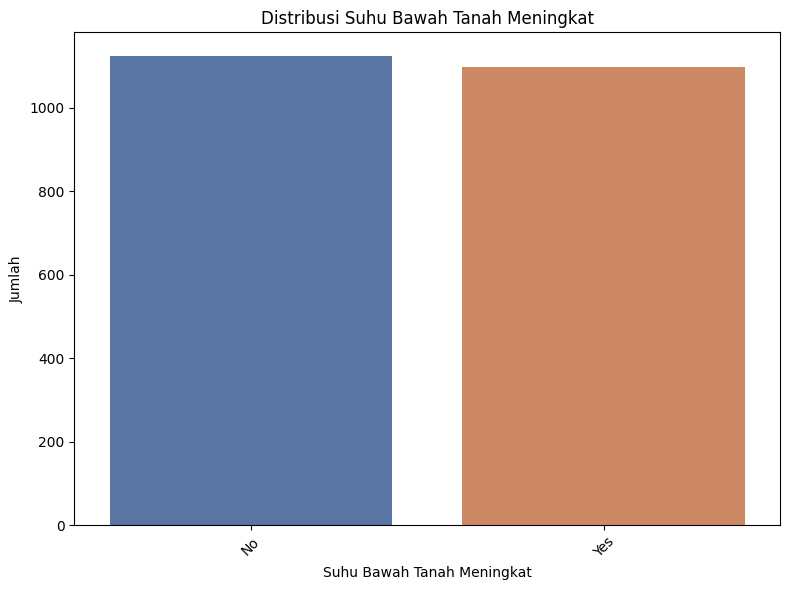

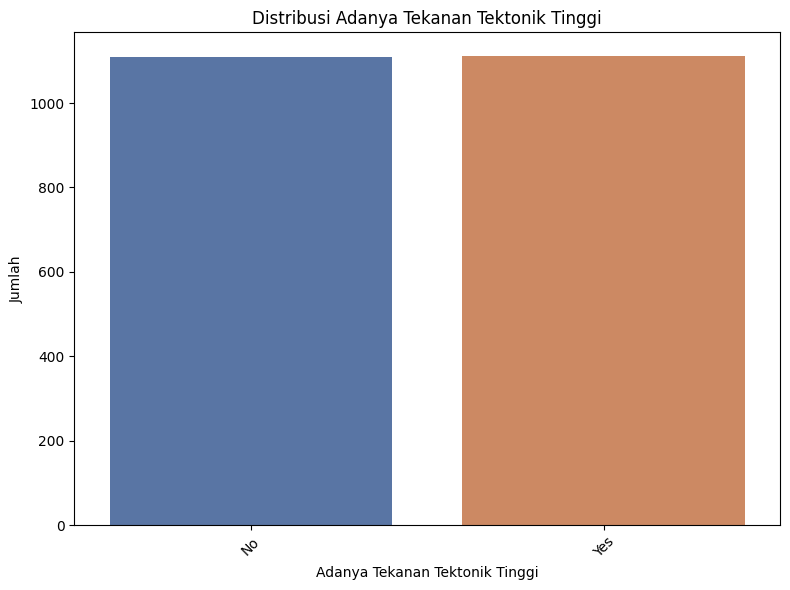

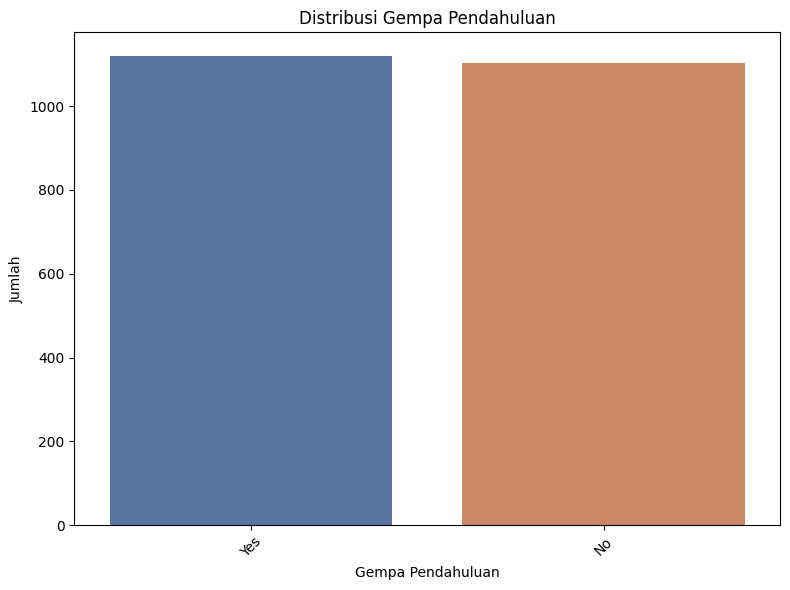

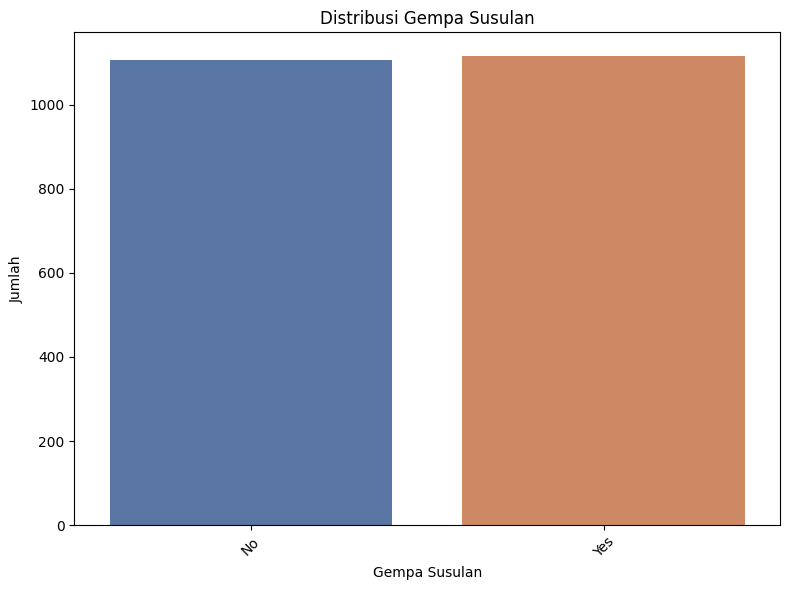

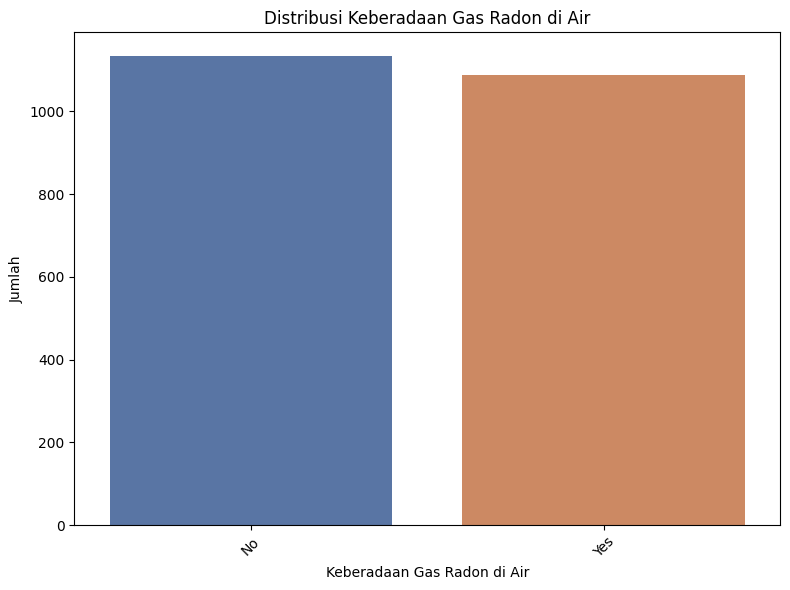

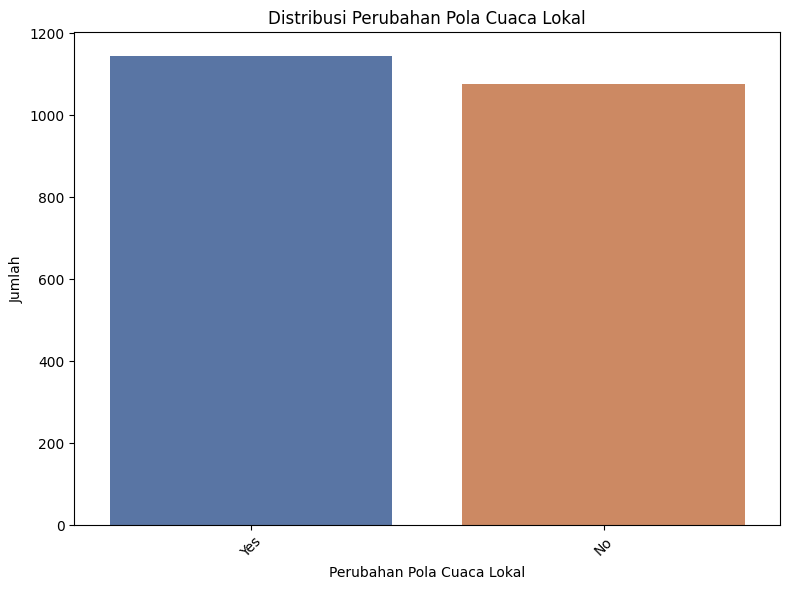

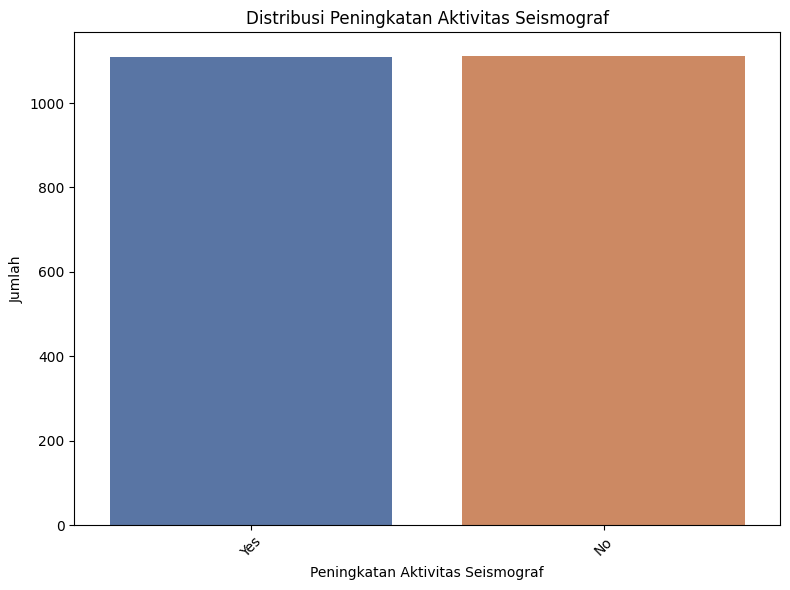

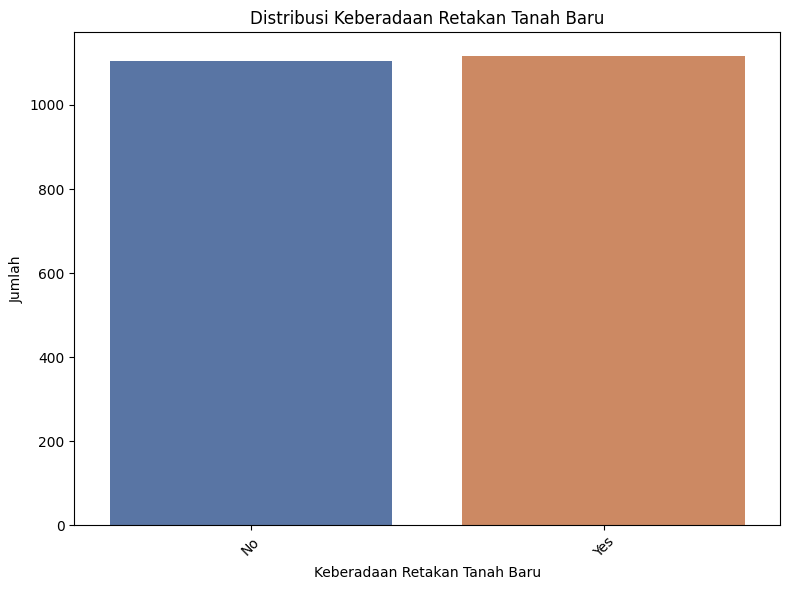

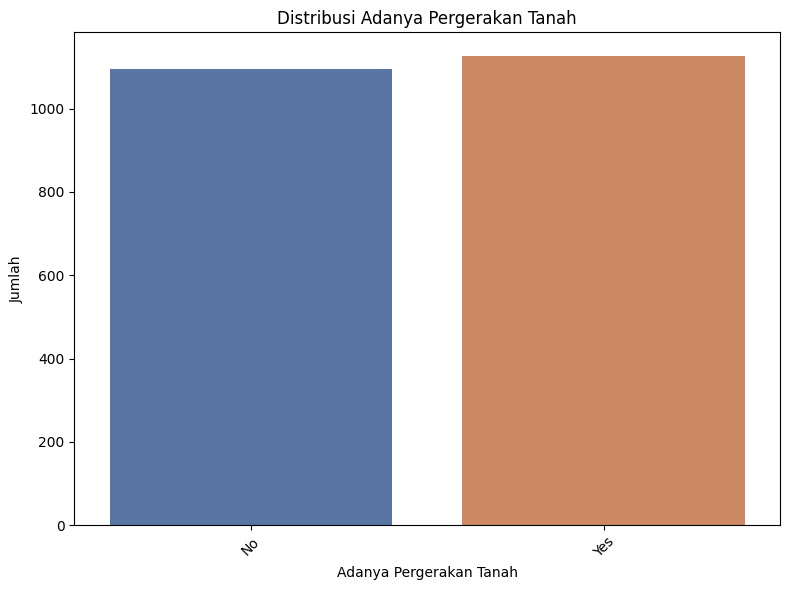

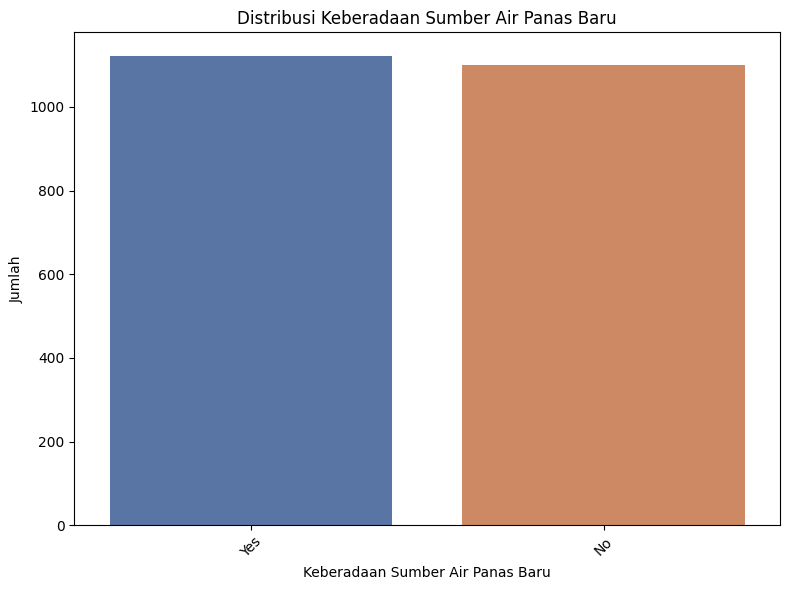

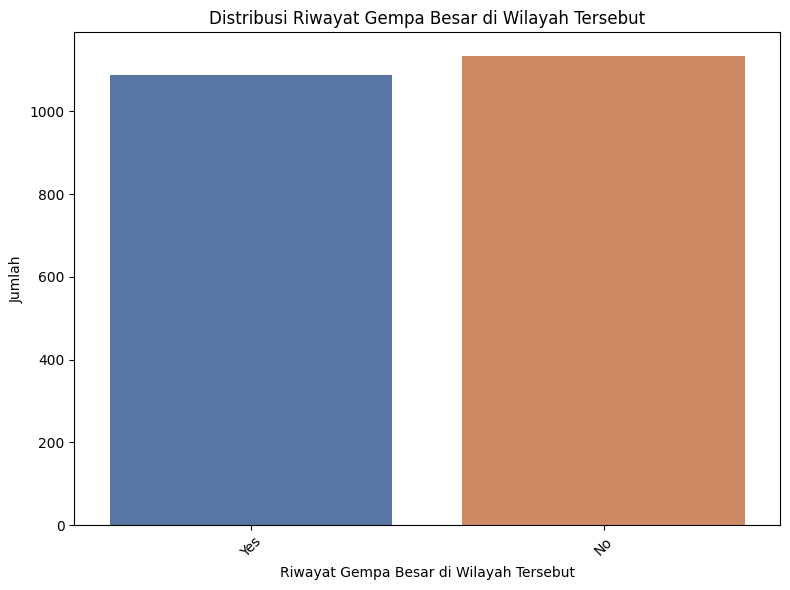

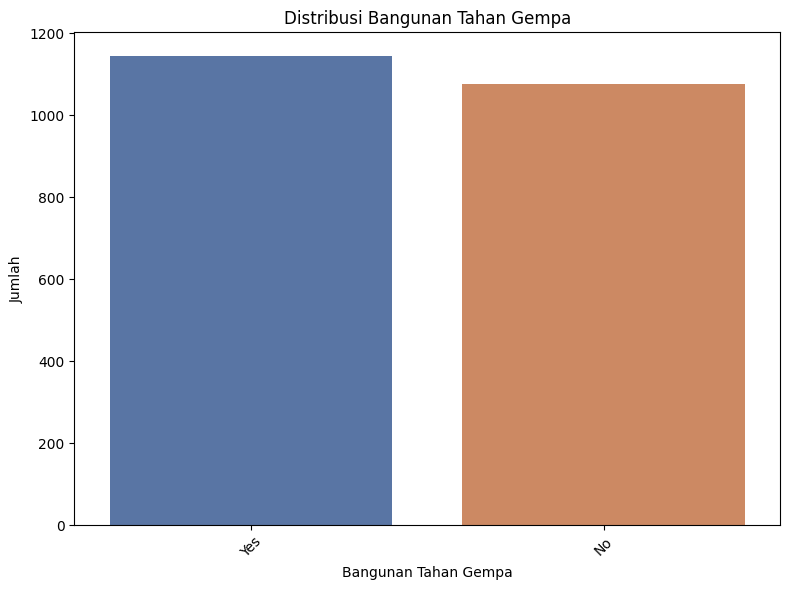

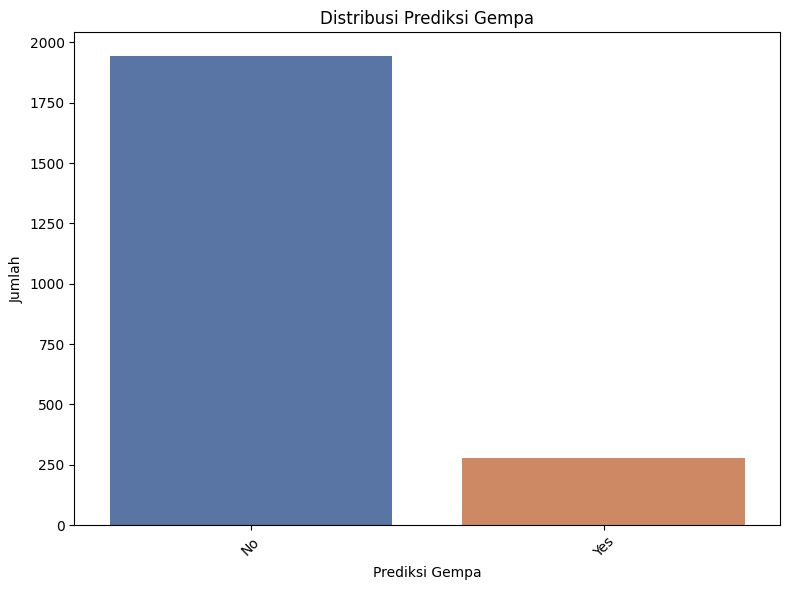

In [16]:
# Langkah 3: Data Visualization
# Membuat beberapa visualisasi dasar untuk memahami distribusi data

# Mendefinisikan fungsi plot_bar_chart yang menerima parameter data dan column
# Fungsi ini akan membuat visualisasi bar chart untuk setiap kolom
def plot_bar_chart(data, column):
    # Membuat figure baru dengan ukuran 8x6 inch
    plt.figure(figsize=(8, 6))
    
    # Membuat bar chart menggunakan seaborn countplot
    # x = nama kolom yang akan divisualisasikan
    # data = dataframe yang digunakan
    # hue = memberikan warna berbeda untuk setiap nilai unik pada kolom
    # palette = skema warna yang digunakan ("deep")
    # legend = False untuk menyembunyikan legend
    sns.countplot(x=column, data=data, hue=column, palette="deep", legend=False)
    
    # Menambahkan judul grafik
    plt.title(f'Distribusi {column}')
    
    # Menambahkan label pada sumbu x dan y
    plt.xlabel(column)
    plt.ylabel('Jumlah')
    
    # Memutar label sumbu x 45 derajat agar lebih mudah dibaca
    plt.xticks(rotation=45)
    
    # Mengatur layout agar tidak tumpang tindih
    plt.tight_layout()
    
    # Menampilkan plot
    plt.show()

# Melakukan iterasi untuk setiap kolom dalam dataframe
# Dan membuat bar chart untuk masing-masing kolom menggunakan fungsi plot_bar_chart
for column in df.columns:
    plot_bar_chart(df, column)


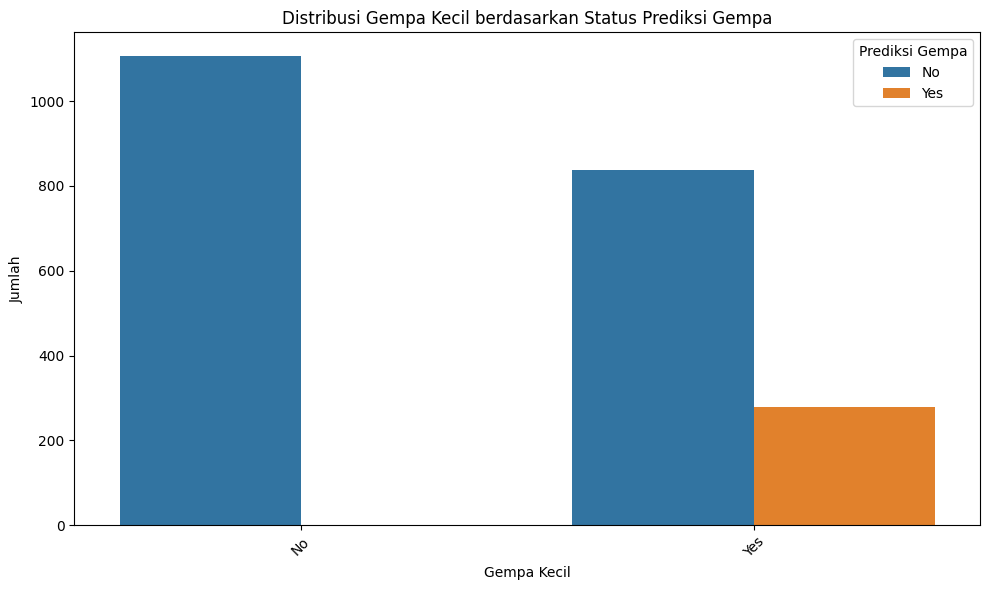

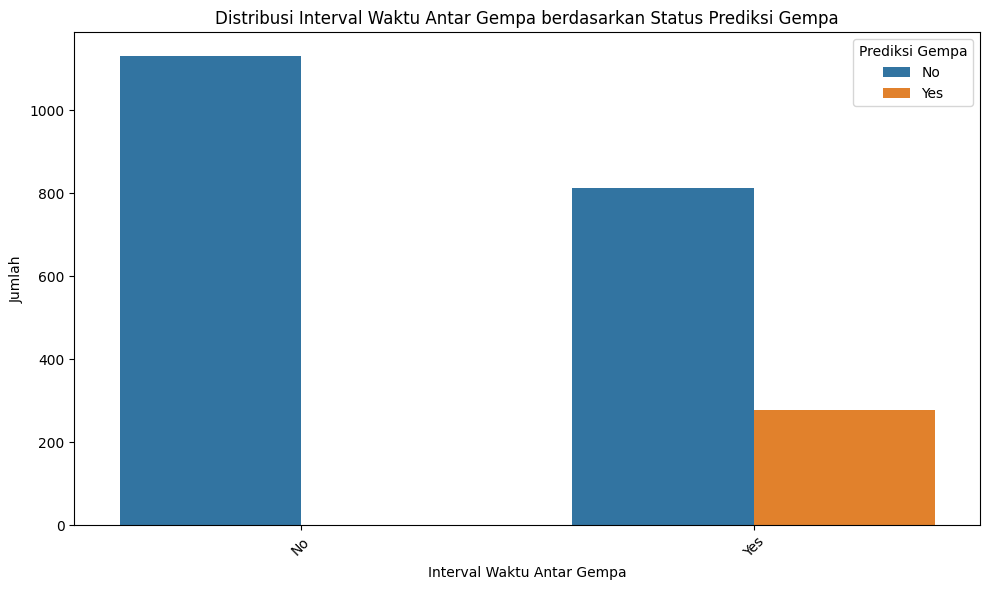

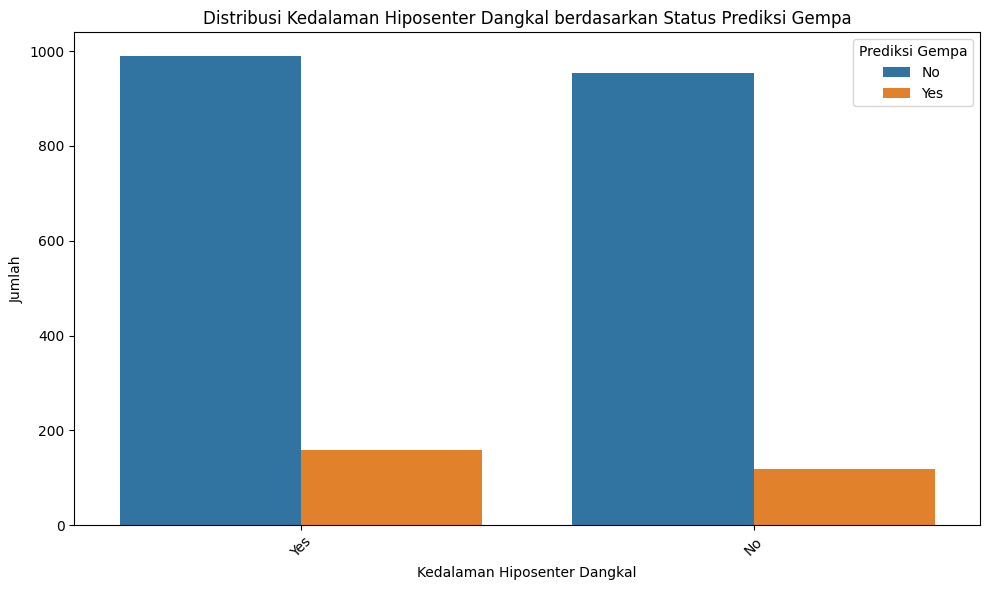

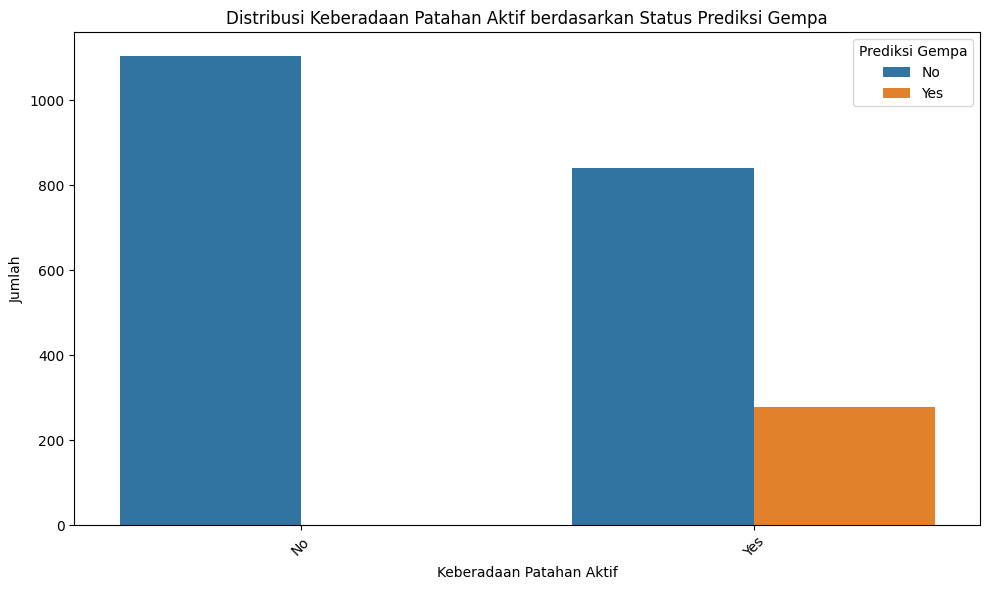

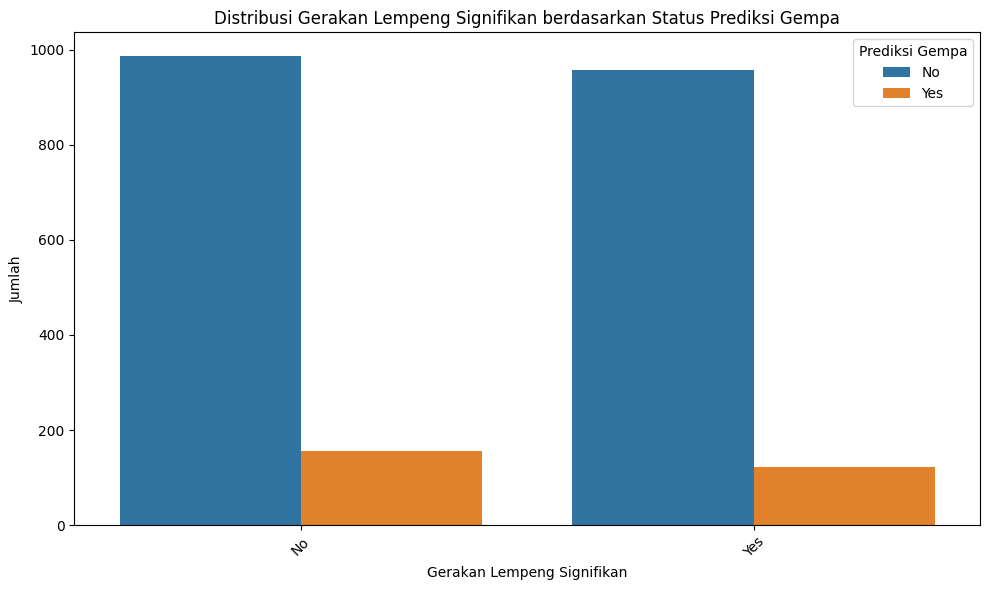

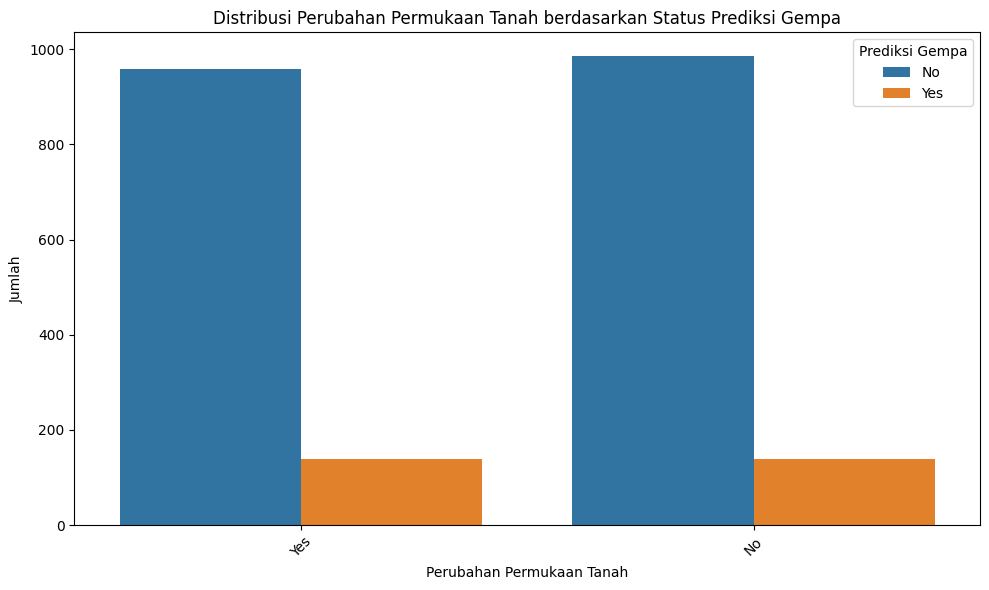

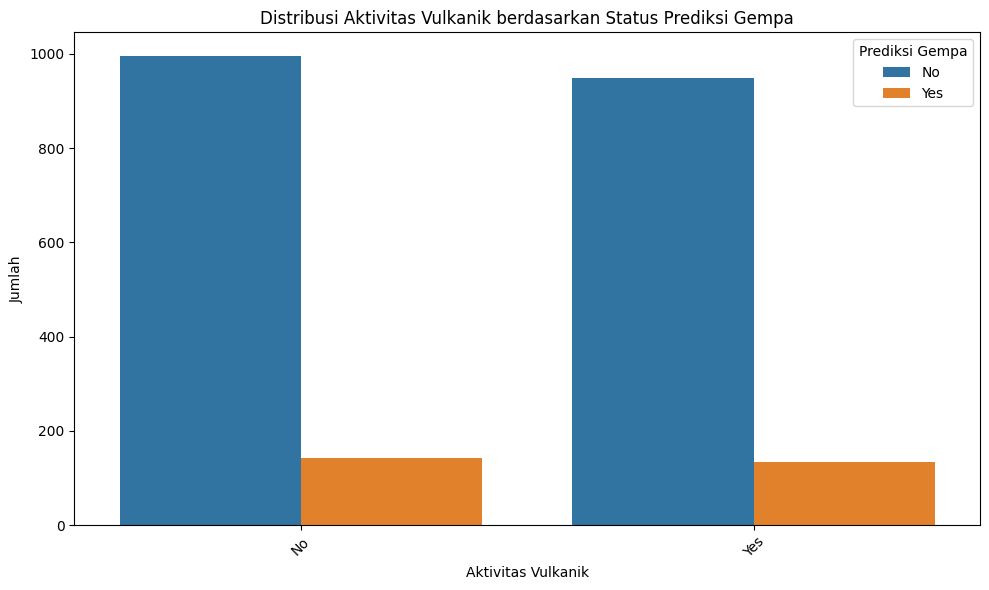

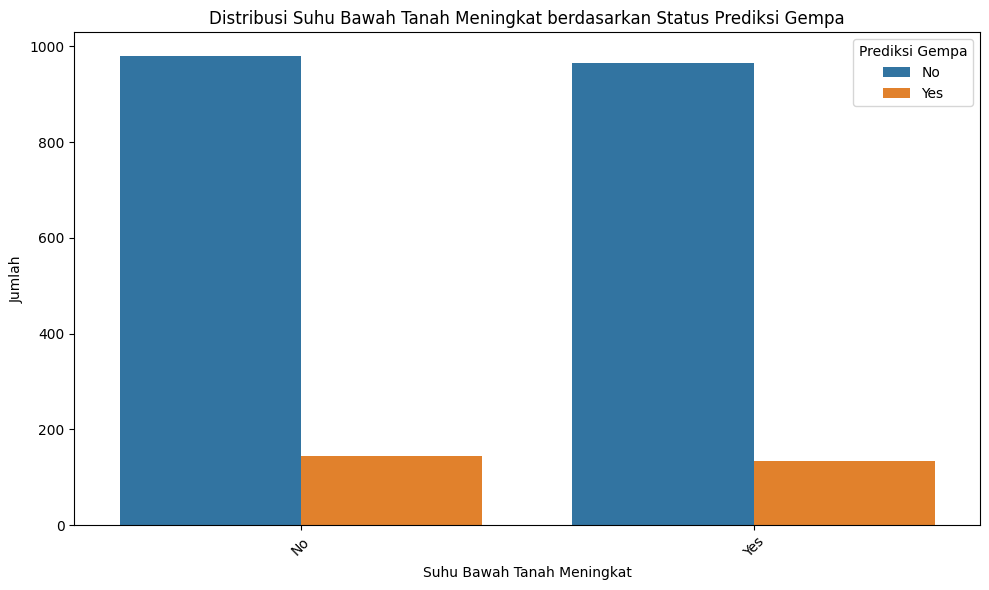

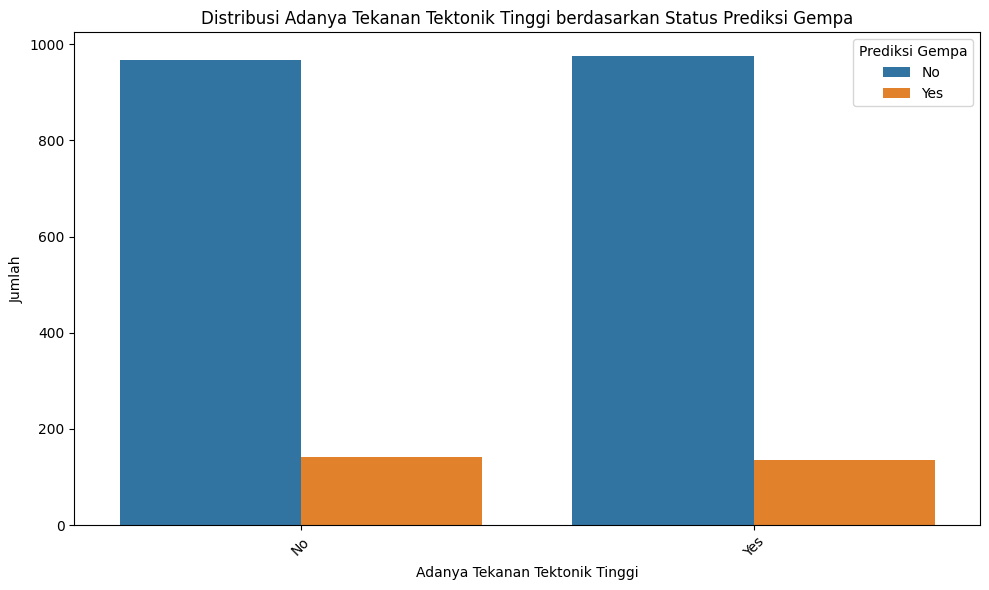

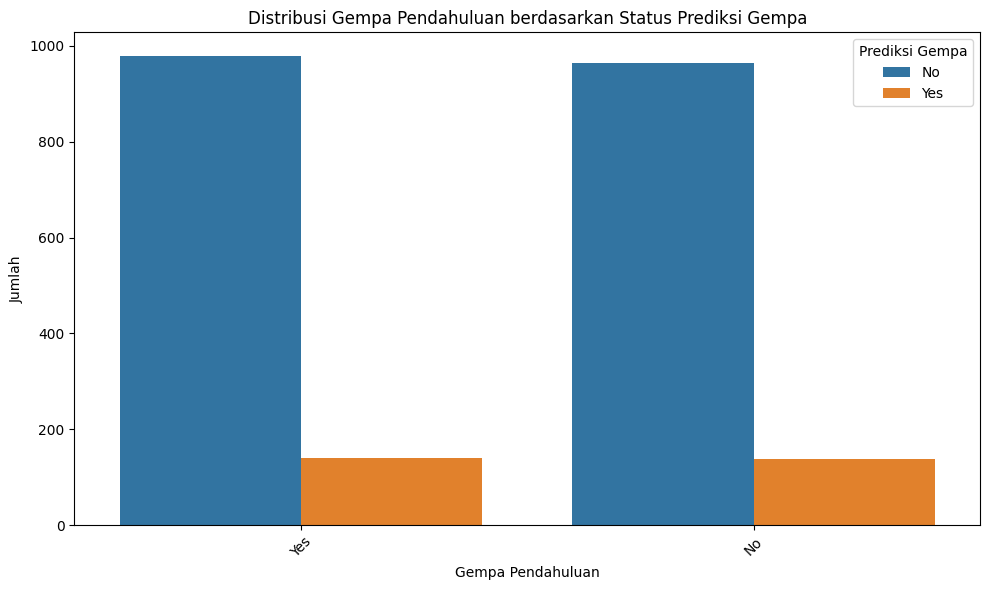

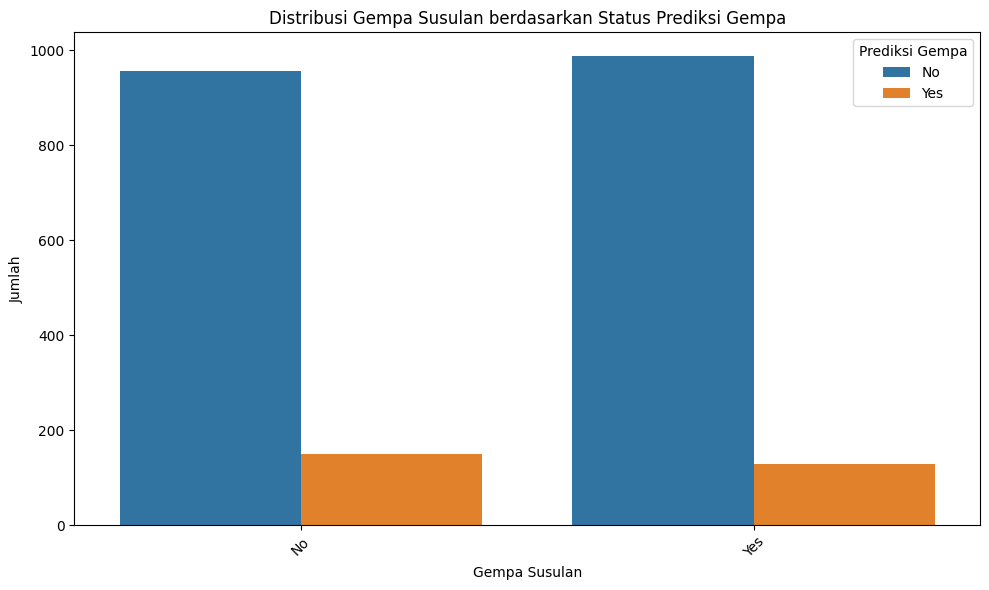

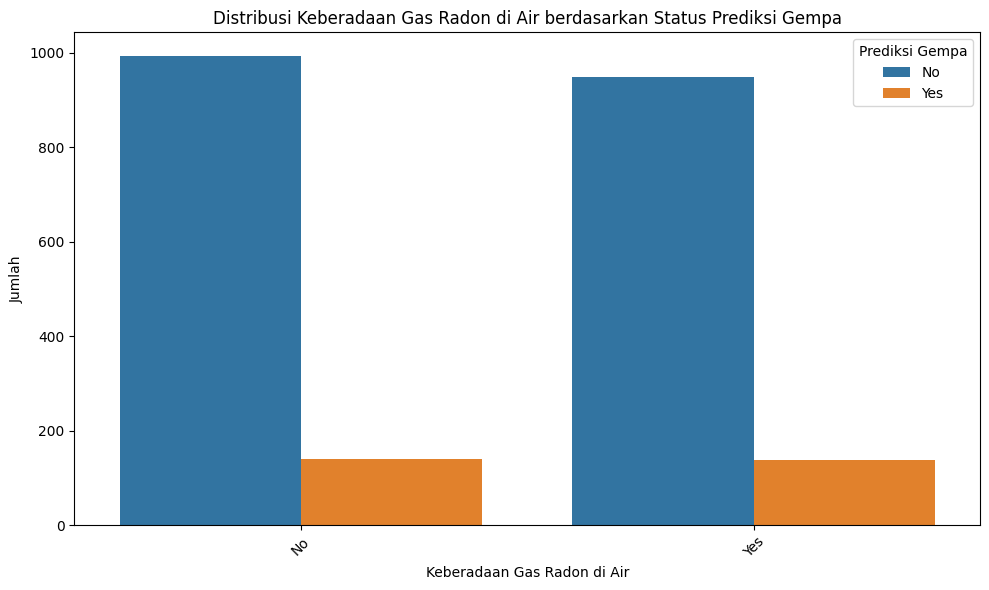

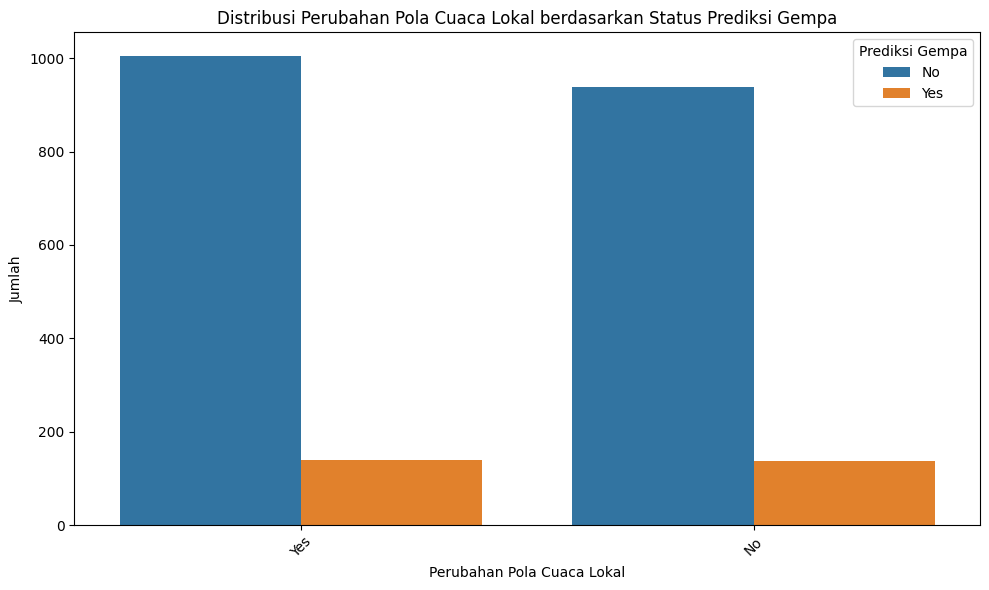

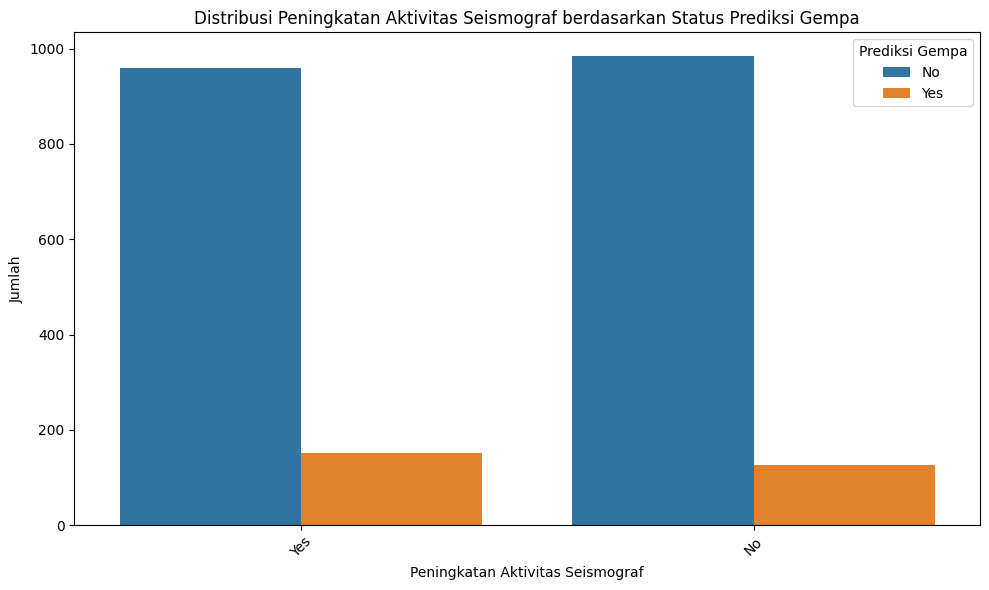

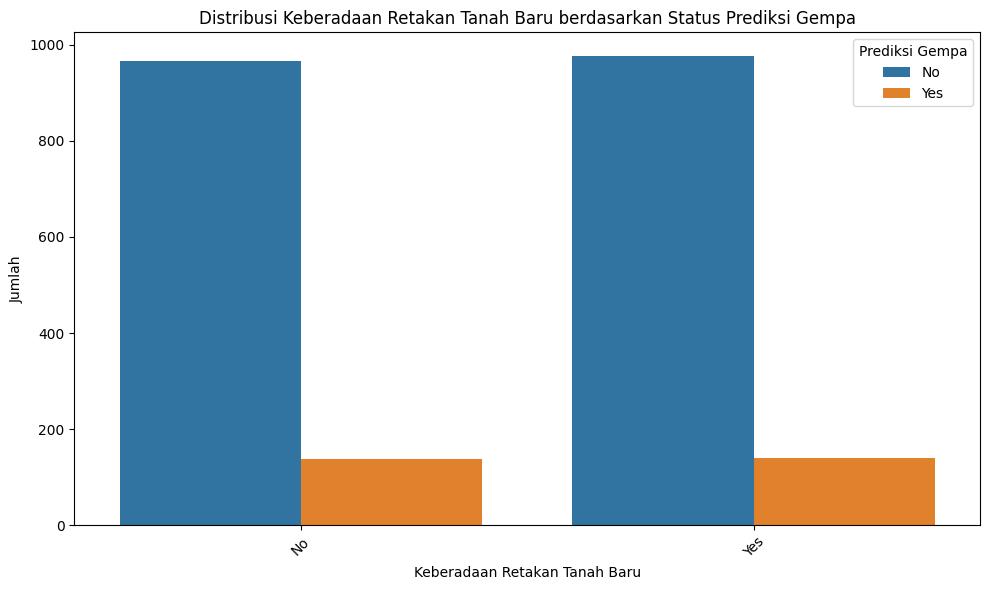

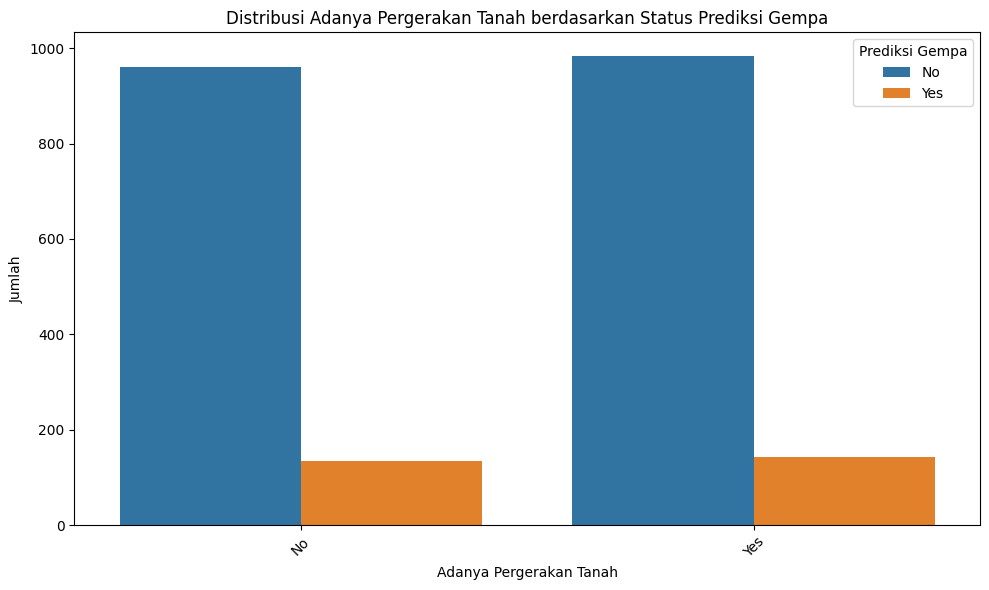

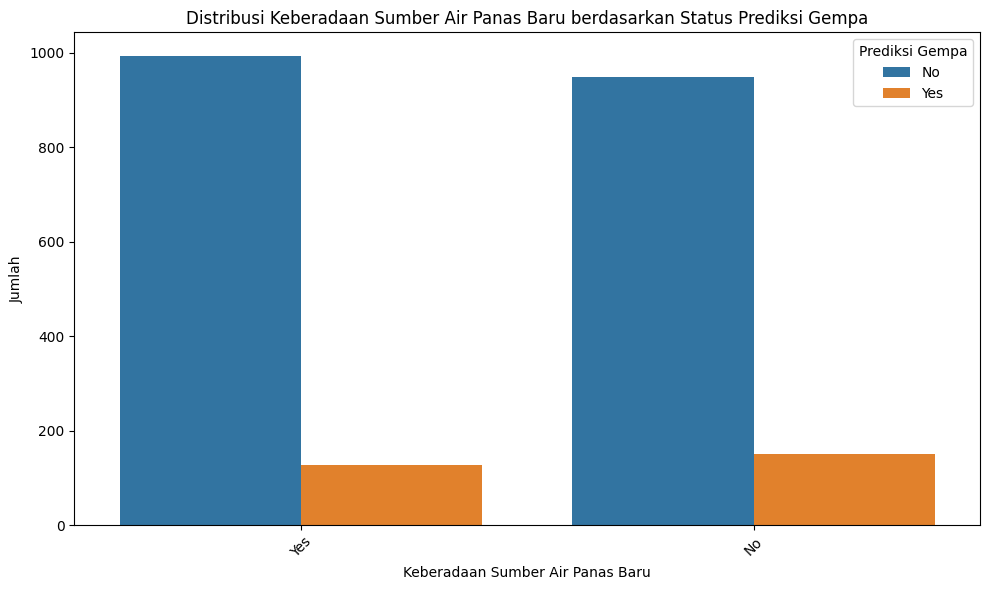

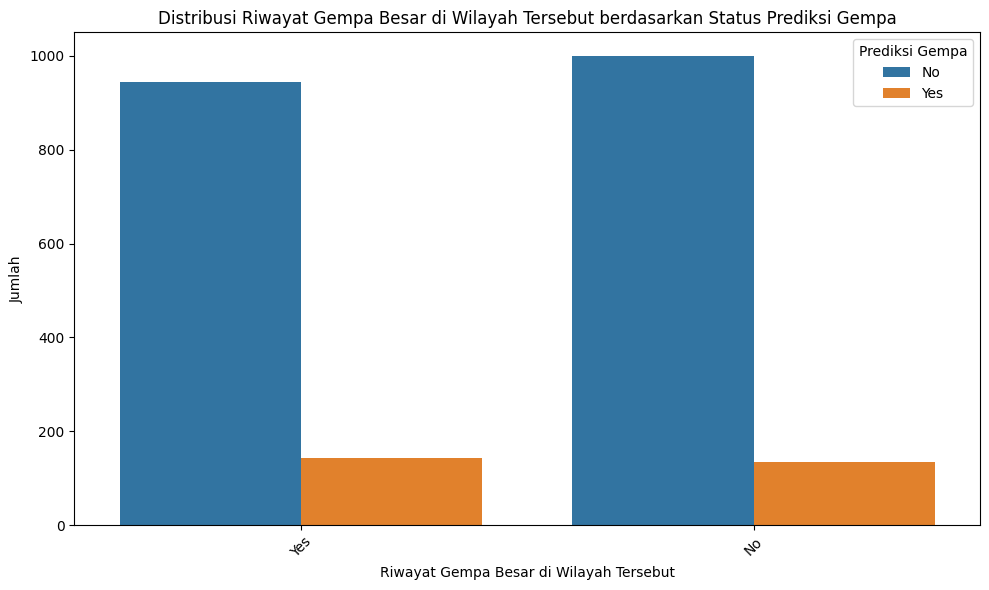

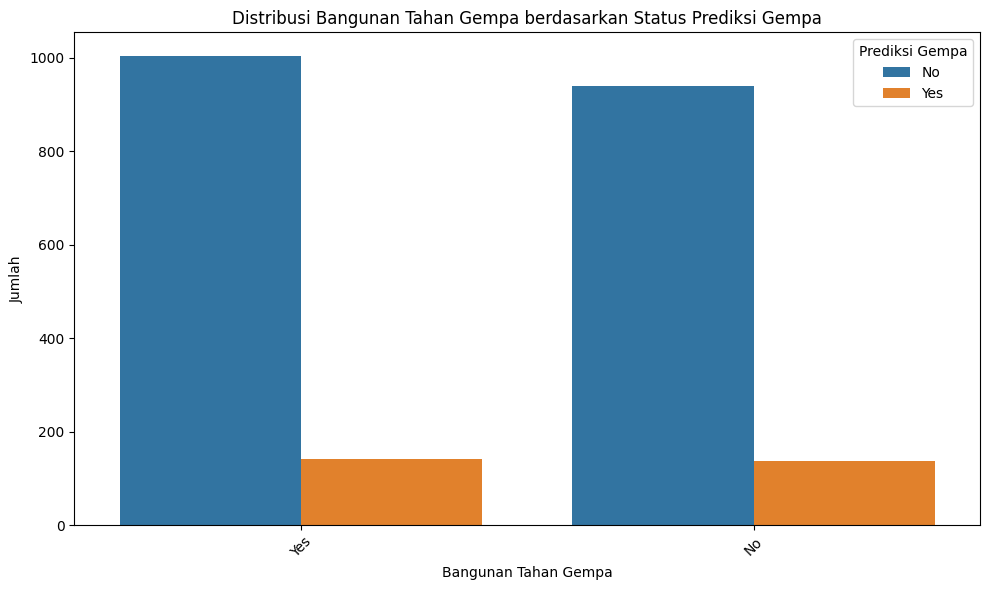

In [17]:
# Mendefinisikan fungsi untuk membuat bar chart yang membandingkan setiap kolom dengan status Prediksi Gempa
def plot_stacked_bar_chart(data, column):
    # Membuat figure baru dengan ukuran 10x6 inch
    plt.figure(figsize=(10, 6))
    
    # Membuat bar chart menggunakan seaborn countplot
    # x = kolom yang akan divisualisasikan
    # hue = memberikan warna berbeda berdasarkan status Prediksi Gempa
    # data = dataframe yang digunakan
    sns.countplot(x=column, hue='Prediksi Gempa', data=data)
    
    # Menambahkan judul grafik
    plt.title(f'Distribusi {column} berdasarkan Status Prediksi Gempa')
    
    # Menambahkan label pada sumbu x dan y
    plt.xlabel(column)
    plt.ylabel('Jumlah')
    
    # Memutar label sumbu x 45 derajat agar lebih mudah dibaca
    plt.xticks(rotation=45)
    
    # Menambahkan legend dengan judul 'Prediksi gempa' di pojok kanan atas
    plt.legend(title='Prediksi Gempa', loc='upper right')
    
    # Mengatur layout agar tidak tumpang tindih
    plt.tight_layout()
    
    # Menampilkan plot
    plt.show()

# Melakukan iterasi untuk setiap kolom dalam dataframe
# Dan membuat bar chart untuk membandingkan dengan status COVID-19
# Kecuali untuk kolom 'COVID-19' itu sendiri
for column in df.columns:
    if column != 'Prediksi Gempa':
        plot_stacked_bar_chart(df, column)

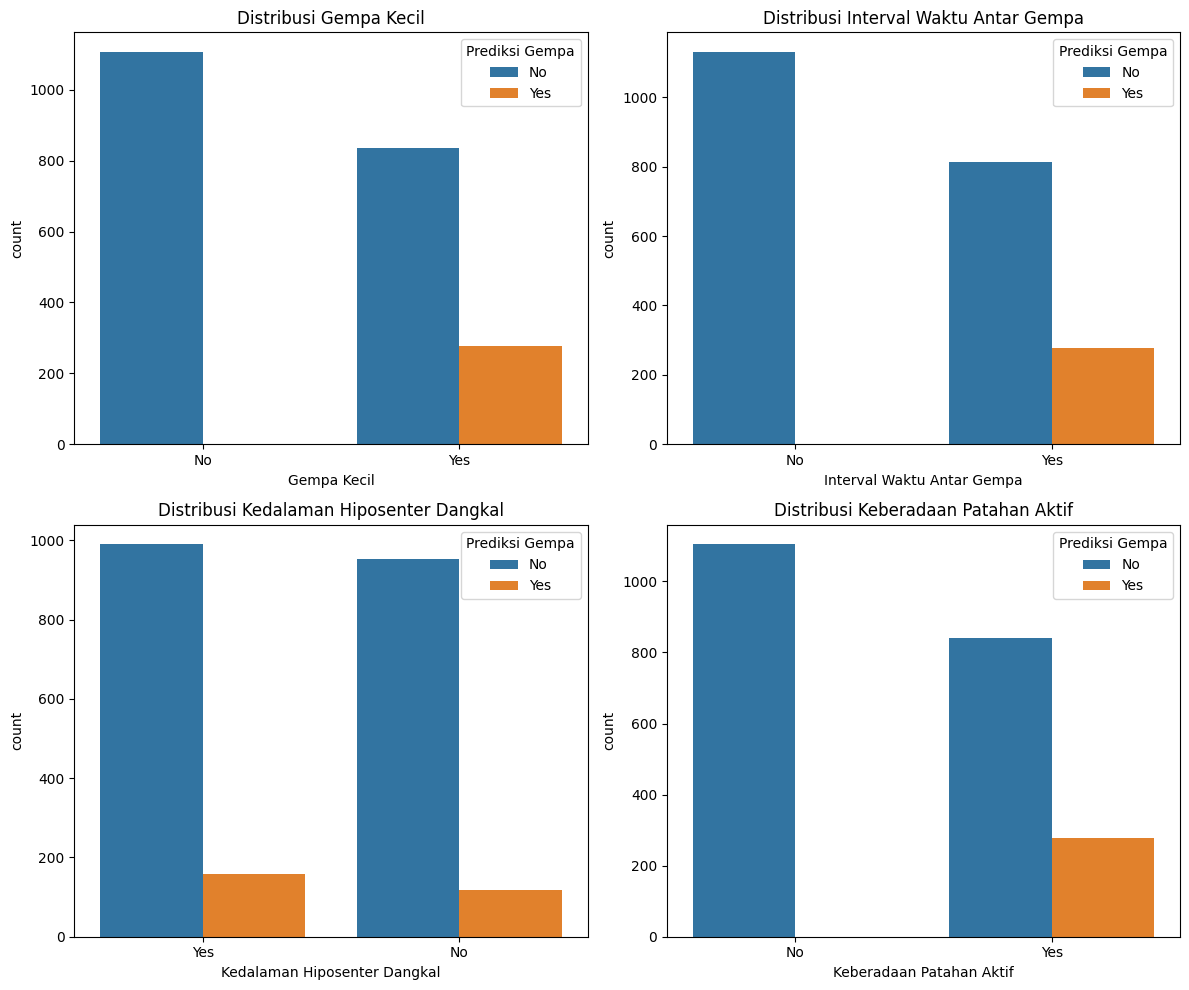

In [18]:
# Mendefinisikan fitur-fitur kunci yang akan divisualisasikan
# Yaitu kondisi utama Prediksi Gempa: Gempa Kecil,Interval Waktu Antar Gempa,Kedalaman Hiposenter Dangkal, dan Keberadaan Patahan Aktif
fitur_kunci = ['Gempa Kecil', 'Interval Waktu Antar Gempa', 'Kedalaman Hiposenter Dangkal', 'Keberadaan Patahan Aktif']

# Membuat subplot dengan ukuran 2x2 (total 4 plot) dan ukuran figure 12x10 inch
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Melakukan iterasi untuk setiap fitur kunci
for i, fitur in enumerate(fitur_kunci):
    # Membuat countplot untuk setiap fitur
    # x = fitur yang akan divisualisasikan
    # hue = memberikan warna berbeda berdasarkan status Prediksi Gempa
    # data = dataframe yang digunakan
    # ax = menentukan posisi subplot (menggunakan integer division dan modulo)
    # i//2 menentukan baris (0 atau 1)
    # i%2 menentukan kolom (0 atau 1)
    sns.countplot(x=fitur, hue='Prediksi Gempa', data=df, ax=axes[i//2, i%2])
    
    # Menambahkan judul untuk setiap subplot
    axes[i//2, i%2].set_title(f'Distribusi {fitur}')

# Mengatur layout agar subplot tidak tumpang tindih
plt.tight_layout()

# Menampilkan seluruh plot
plt.show()

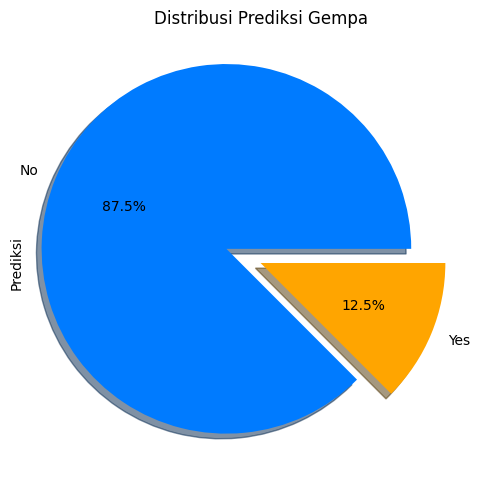

In [19]:
# Membuat pie chart untuk menampilkan distribusi Prediksi Gempa

# Membuat efek 'explode' untuk memisahkan potongan pie sebesar 0.2 untuk slice pertama
# dan 0 untuk slice kedua
explode = (0.2, 0)

# Membuat figure dengan ukuran 8x6 inch
plt.figure(figsize=(8, 6))

# Membuat pie chart:
# - Menghitung jumlah nilai unik dalam kolom Prediksi Gempa menggunakan value_counts()
# - Mengatur jenis plot menjadi 'pie'
# - autopct='%1.1f%%' untuk menampilkan persentase dengan 1 desimal
# - startangle=0 mengatur sudut awal pie chart
# - colors mengatur warna slice (biru dan oranye)
# - shadow=True memberikan efek bayangan
# - explode mengatur jarak pemisahan slice
df['Prediksi Gempa'].value_counts().plot(kind='pie', 
                                 autopct='%1.1f%%', 
                                 startangle=0, 
                                 colors=['#007BFF', '#FFA500'], 
                                 shadow=True, 
                                 explode=explode)

# Menambahkan judul grafik
plt.title('Distribusi Prediksi Gempa')

# Menambahkan label untuk sumbu y
plt.ylabel('Prediksi')

# Menampilkan plot
plt.show()

In [20]:
# Melakukan encoding pada variabel kategorikal (mengubah data teks menjadi numerik)
# Membuat objek LabelEncoder untuk melakukan proses encoding
label_encoder = LabelEncoder()

# Melakukan iterasi untuk setiap kolom yang bertipe object (string/teks) dalam dataframe
for column in df.select_dtypes(include=[object]).columns:
    # Mengubah nilai kategorikal menjadi numerik menggunakan fit_transform
    # fit_transform akan:
    # 1. Mempelajari kategori unik dalam kolom (fit)
    # 2. Mengubah setiap kategori menjadi angka (transform)
    # Contoh: 'Yes' -> 1, 'No' -> 0
    df[column] = label_encoder.fit_transform(df[column])


In [21]:
df

,Gempa Kecil,Interval Waktu Antar Gempa,Kedalaman Hiposenter Dangkal,Keberadaan Patahan Aktif,Gerakan Lempeng Signifikan,Perubahan Permukaan Tanah,Aktivitas Vulkanik,Suhu Bawah Tanah Meningkat,Adanya Tekanan Tektonik Tinggi,Gempa Pendahuluan,Gempa Susulan,Keberadaan Gas Radon di Air,Perubahan Pola Cuaca Lokal,Peningkatan Aktivitas Seismograf,Keberadaan Retakan Tanah Baru,Adanya Pergerakan Tanah,Keberadaan Sumber Air Panas Baru,Riwayat Gempa Besar di Wilayah Tersebut,Bangunan Tahan Gempa,Prediksi Gempa
0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,1,1,0
1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,0,1,1,1,1,1,0,0,1,1,0,0,0,1,1,1,0
3,1,0,0,0,1,1,1,0,0,1,0,1,1,0,0,0,1,0,0,0
4,0,1,0,0,0,0,1,1,1,1,0,0,1,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2217,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,0,0
2218,0,0,1,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,0
2219,0,1,1,0,0,1,0,0,0,0,1,0,1,1,1,0,1,0,0,0
2220,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,1,0,0


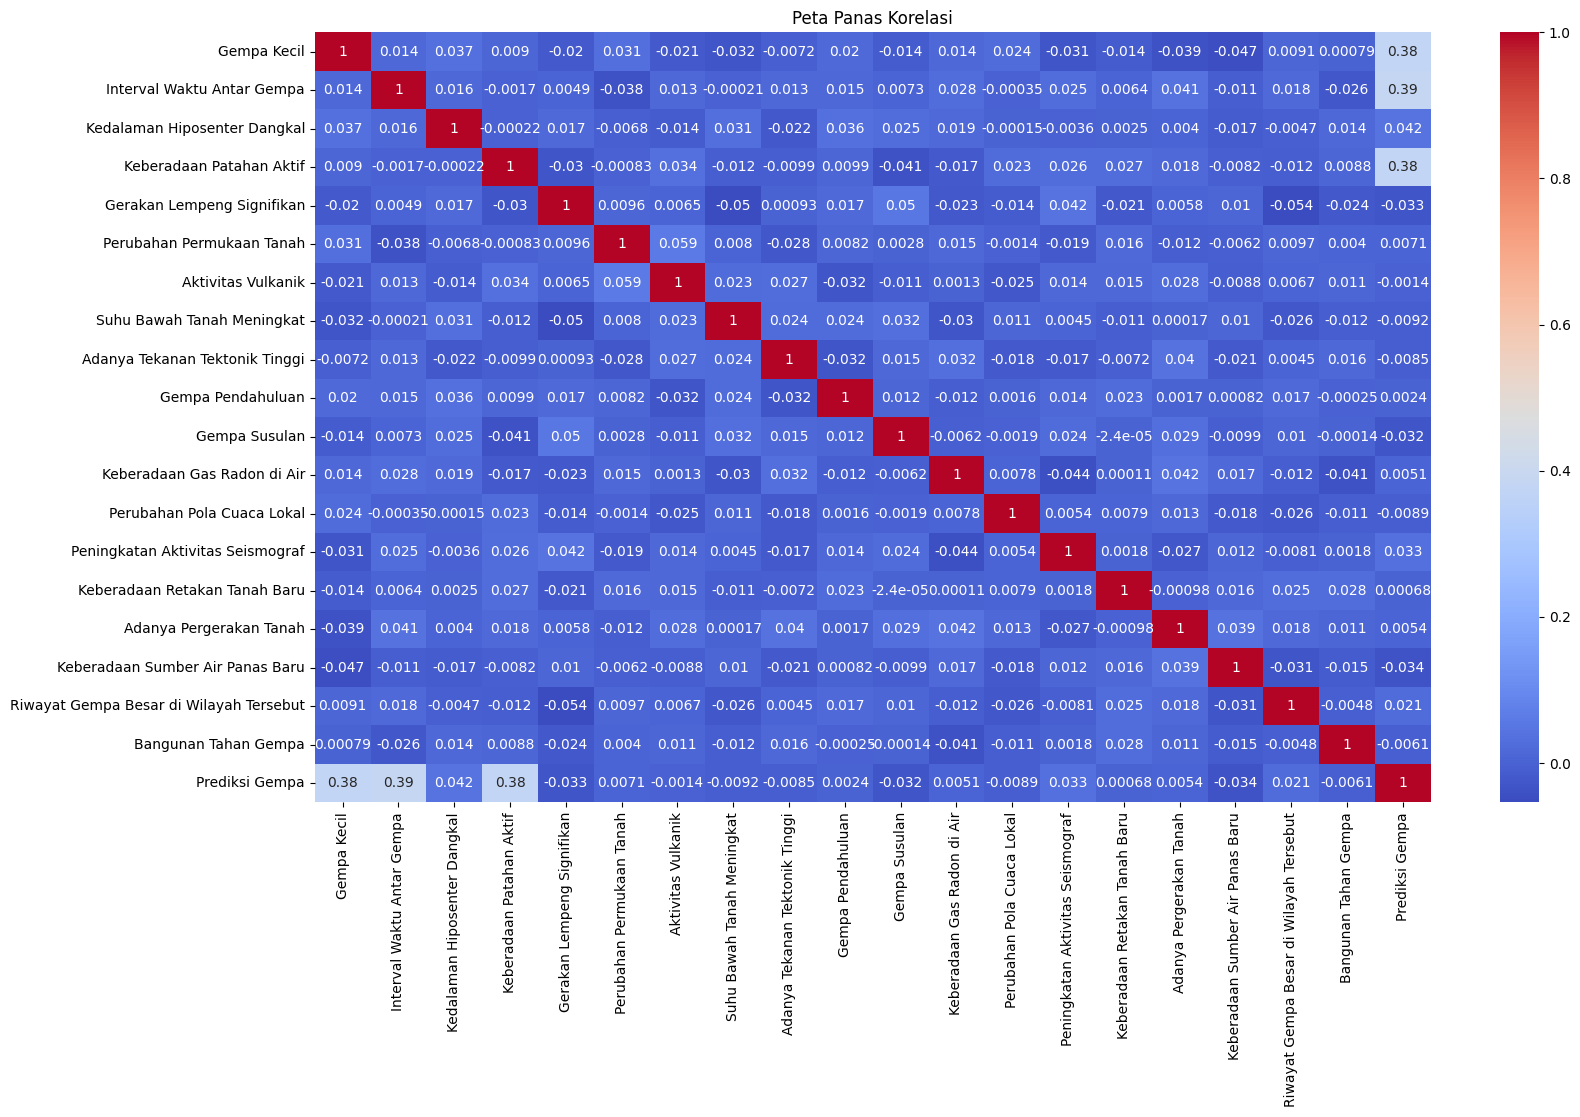

In [22]:
# Membuat visualisasi peta panas (heatmap) untuk melihat korelasi antar variabel numerik

# Memilih kolom-kolom yang bertipe numerik (integer dan float) dari dataframe
kolom_numerik = df.select_dtypes(include=['int64', 'float64']).columns

# Membuat figure dengan ukuran 18x10 inci
plt.figure(figsize=(18, 10))

# Membuat peta panas menggunakan seaborn:
# - df[kolom_numerik].corr() menghitung korelasi antar kolom numerik
# - annot=True menampilkan nilai korelasi di setiap sel
# - cmap='coolwarm' mengatur skema warna (merah=korelasi positif, biru=korelasi negatif)
sns.heatmap(df[kolom_numerik].corr(), annot=True, cmap='coolwarm')

# Menambahkan judul pada plot
plt.title('Peta Panas Korelasi')

# Menampilkan visualisasi
plt.show()

In [23]:
# Langkah 5: Memisahkan data menjadi fitur (X) dan target/label (y)

# Membuat variabel X yang berisi semua kolom kecuali kolom 'Prediksi Gempa'
# df.drop(columns=['Prediksi Gempa']) akan menghapus kolom 'Prediksi Gempa' dari dataframe
# dan menyimpan hasilnya ke variabel X sebagai fitur untuk model
X = df.drop(columns=['Prediksi Gempa'])

# Membuat variabel y yang hanya berisi kolom 'Prediksi Gempa' 
# df['Prediksi Gempa'] akan mengambil kolom 'Prediksi Gempa' saja
# dan menyimpannya ke variabel y sebagai target/label yang akan diprediksi
y = df['Prediksi Gempa']

In [24]:
# Langkah 6: Data Balancing Menggunakan SMOTE

# Membuat objek SMOTE dengan random_state=42 untuk memastikan hasil yang konsisten
# SMOTE (Synthetic Minority Over-sampling Technique) adalah teknik untuk menangani data yang tidak seimbang
# dengan cara membuat sampel sintetis dari kelas minoritas
smote = SMOTE(random_state=42)

# Melakukan resampling data menggunakan SMOTE:
# - X_balanced: fitur yang sudah diseimbangkan jumlah kelasnya
# - y_balanced: target/label yang sudah diseimbangkan jumlah kelasnya
# fit_resample() akan membuat sampel baru sehingga jumlah data di setiap kelas menjadi sama
X_balanced, y_balanced = smote.fit_resample(X, y)


In [25]:
# Langkah 7: Membagi data menjadi data latih dan data uji
# train_test_split() adalah fungsi untuk membagi dataset menjadi data latih dan data uji
# Parameter yang digunakan:
# - X_balanced: fitur yang sudah diseimbangkan dengan SMOTE
# - y_balanced: target/label yang sudah diseimbangkan dengan SMOTE  
# - test_size=0.2: 20% data akan digunakan sebagai data uji, sisanya 80% untuk data latih
# - random_state=42: untuk memastikan hasil pembagian data yang konsisten setiap kali kode dijalankan
# - stratify=y_balanced: memastikan proporsi kelas pada data latih dan uji tetap seimbang
# Hasil pembagian disimpan ke dalam 4 variabel:
# - X_train: fitur untuk data latih (80% data)
# - X_test: fitur untuk data uji (20% data)
# - y_train: label untuk data latih (80% data)
# - y_test: label untuk data uji (20% data)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

In [26]:
# Menampilkan ringkasan dari pembagian data setelah SMOTE
# Mencetak dimensi/ukuran dari data latih fitur (X_train)
# shape akan menampilkan (jumlah baris, jumlah kolom)
print("Dimensi X_train:", X_train.shape)

# Mencetak dimensi/ukuran dari data latih label (y_train)
# shape akan menampilkan (jumlah baris,) karena y_train hanya 1 kolom
print("Dimensi y_train:", y_train.shape)

# Mencetak dimensi/ukuran dari data uji fitur (X_test)
# shape akan menampilkan (jumlah baris, jumlah kolom) 
print("Dimensi X_test:", X_test.shape)

# Mencetak dimensi/ukuran dari data uji label (y_test)
# shape akan menampilkan (jumlah baris,) karena y_test hanya 1 kolom
print("Dimensi y_test:", y_test.shape)

# Mencetak distribusi kelas pada data latih label (y_train)
# value_counts() akan menghitung jumlah data untuk setiap kelas
print("Distribusi kelas pada y_train:")
print(y_train.value_counts())

# Mencetak nama-nama fitur yang digunakan dalam model
# columns akan menampilkan daftar nama kolom dari X_train
print("Fitur yang digunakan:", X_train.columns)

Dimensi X_train: (3110, 19)
Dimensi y_train: (3110,)
Dimensi X_test: (778, 19)
Dimensi y_test: (778,)
Distribusi kelas pada y_train:
Prediksi Gempa
0    1555
1    1555
Name: count, dtype: int64
Fitur yang digunakan: Index(['Gempa Kecil', 'Interval Waktu Antar Gempa',
       'Kedalaman Hiposenter Dangkal', 'Keberadaan Patahan Aktif',
       'Gerakan Lempeng Signifikan', 'Perubahan Permukaan Tanah',
       'Aktivitas Vulkanik', 'Suhu Bawah Tanah Meningkat',
       'Adanya Tekanan Tektonik Tinggi', 'Gempa Pendahuluan', 'Gempa Susulan',
       'Keberadaan Gas Radon di Air', 'Perubahan Pola Cuaca Lokal',
       'Peningkatan Aktivitas Seismograf', 'Keberadaan Retakan Tanah Baru',
       'Adanya Pergerakan Tanah', 'Keberadaan Sumber Air Panas Baru',
       'Riwayat Gempa Besar di Wilayah Tersebut', 'Bangunan Tahan Gempa'],
      dtype='object')


<p style="background-color:darkgrey; font-family:calibri; color:white; font-size:250%; text-align:center; border-radius:50px 50px; padding-top:10px; padding-bottom:10px;">4. Modelling</p>

In [27]:
# Membuat model Decision Tree untuk klasifikasi
# DecisionTreeClassifier adalah algoritma pembelajaran mesin yang membuat keputusan berdasarkan aturan if-else
# Parameter random_state=42 digunakan untuk memastikan hasil yang konsisten setiap kali kode dijalankan
dt_model = DecisionTreeClassifier(random_state=42)

# Melatih model Decision Tree menggunakan data latih (X_train dan y_train)
# fit() akan mempelajari pola dari data latih untuk membuat pohon keputusan
dt_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan model yang sudah dilatih pada data uji (X_test)
# predict() akan menghasilkan prediksi kelas untuk setiap data dalam X_test
# Hasil prediksi disimpan dalam variabel y_pred_dt untuk evaluasi model
y_pred_dt = dt_model.predict(X_test)

In [28]:
# Membuat model Random Forest untuk klasifikasi
# Random Forest adalah algoritma ensemble yang menggunakan banyak pohon keputusan
# random_state=42 digunakan untuk memastikan hasil yang konsisten setiap kali kode dijalankan
# n_estimators=100 menentukan jumlah pohon keputusan yang akan dibuat (100 pohon)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Melatih model Random Forest menggunakan data latih (X_train dan y_train)
# fit() akan mempelajari pola dari data latih dengan membuat 100 pohon keputusan yang berbeda
rf_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan model yang sudah dilatih pada data uji (X_test)
# predict() akan menghasilkan prediksi kelas untuk setiap data dalam X_test
# Hasil prediksi disimpan dalam variabel y_pred_rf untuk evaluasi model
y_pred_rf = rf_model.predict(X_test)

In [29]:
# Membuat model Naive Bayes untuk klasifikasi
# GaussianNB() adalah algoritma Naive Bayes yang mengasumsikan fitur-fitur berdistribusi normal/Gaussian
# Naive Bayes bekerja berdasarkan teorema Bayes dengan asumsi bahwa setiap fitur independen satu sama lain
nb_model = GaussianNB()

# Melatih model Naive Bayes menggunakan data latih (X_train dan y_train)
# fit() akan mempelajari probabilitas setiap fitur untuk setiap kelas dari data latih
nb_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan model yang sudah dilatih pada data uji (X_test)
# predict() akan menghasilkan prediksi kelas untuk setiap data dalam X_test berdasarkan probabilitas yang telah dipelajari
# Hasil prediksi disimpan dalam variabel y_pred_nb untuk evaluasi model
y_pred_nb = nb_model.predict(X_test)

In [30]:
# Membuat model Support Vector Machine (SVM) untuk klasifikasi
# SVM bekerja dengan mencari hyperplane terbaik yang memisahkan kelas-kelas data
# Parameter kernel='linear' menentukan jenis kernel yang digunakan (dalam hal ini kernel linear)
# random_state=42 digunakan untuk memastikan hasil yang konsisten setiap kali kode dijalankan
svm_model = SVC(kernel='linear', random_state=42)

# Melatih model SVM menggunakan data latih (X_train dan y_train)
# fit() akan mencari hyperplane optimal yang memisahkan kelas-kelas dalam data latih
svm_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan model yang sudah dilatih pada data uji (X_test)
# predict() akan mengklasifikasikan data uji berdasarkan hyperplane yang telah ditemukan
# Hasil prediksi disimpan dalam variabel y_pred_svm untuk evaluasi model
y_pred_svm = svm_model.predict(X_test)

In [31]:
# Membuat model K-Nearest Neighbors (KNN) untuk klasifikasi
# KNN bekerja dengan mencari k tetangga terdekat dari data yang akan diprediksi
# Parameter n_neighbors=5 menentukan jumlah tetangga terdekat yang akan dipertimbangkan (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN menggunakan data latih (X_train dan y_train)
# fit() akan menyimpan data latih sebagai referensi untuk prediksi
knn_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan model yang sudah dilatih pada data uji (X_test)
# predict() akan mencari 5 tetangga terdekat untuk setiap data uji dan menentukan kelas berdasarkan mayoritas
# Hasil prediksi disimpan dalam variabel y_pred_knn untuk evaluasi model
y_pred_knn = knn_model.predict(X_test)

<p style="background-color:darkgrey; font-family:calibri; color:white; font-size:250%; text-align:center; border-radius:50px 50px; padding-top:10px; padding-bottom:10px;">5. Evaluation</p>

In [32]:
# Mendefinisikan fungsi untuk membuat visualisasi confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    # Membuat confusion matrix dengan membandingkan nilai aktual (y_true) dan prediksi (y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    # Membuat figure baru dengan ukuran 8x6 inci
    plt.figure(figsize=(8, 6))
    
    # Membuat heatmap dari confusion matrix menggunakan seaborn
    # annot=True untuk menampilkan nilai di setiap sel
    # fmt='d' untuk format angka sebagai integer
    # cmap='Blues' untuk menggunakan skema warna biru
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    
    # Menambahkan judul plot dengan nama model
    plt.title(f'Confusion Matrix - {model_name}')
    
    # Menambahkan label untuk sumbu y (nilai aktual)
    plt.ylabel('Actual')
    
    # Menambahkan label untuk sumbu x (nilai prediksi) 
    plt.xlabel('Predicted')
    
    # Menampilkan plot
    plt.show()

In [33]:
# Mendefinisikan fungsi untuk membuat plot ROC (Receiver Operating Characteristic) curve
def plot_roc_curve(y_true, y_pred_proba, model_name):
    # Menghitung False Positive Rate (FPR) dan True Positive Rate (TPR)
    # menggunakan fungsi roc_curve dari sklearn
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    
    # Menghitung area di bawah kurva ROC (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Membuat figure baru dengan ukuran 8x6 inci
    plt.figure(figsize=(8, 6))
    
    # Plot kurva ROC dengan warna oranye dan label yang menunjukkan nilai AUC
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    
    # Plot garis baseline (garis diagonal) sebagai pembanding
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    # Mengatur batas sumbu x dari 0 sampai 1
    plt.xlim([0.0, 1.0])
    
    # Mengatur batas sumbu y dari 0 sampai 1.05
    plt.ylim([0.0, 1.05])
    
    # Menambahkan label untuk sumbu x
    plt.xlabel('False Positive Rate')
    
    # Menambahkan label untuk sumbu y
    plt.ylabel('True Positive Rate')
    
    # Menambahkan judul plot dengan nama model
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    
    # Menambahkan legend di pojok kanan bawah
    plt.legend(loc="lower right")
    
    # Menampilkan plot
    plt.show()


In [34]:
# Membuat dictionary yang berisi model-model machine learning yang akan dievaluasi
# Dictionary ini memiliki:
# - Key: nama model (string) 
# - Value: objek model yang sudah dilatih sebelumnya

# models adalah dictionary yang berisi:
# - Decision Tree (dt_model): Model pohon keputusan untuk klasifikasi
# - Random Forest (rf_model): Model random forest yang menggunakan banyak pohon keputusan
# - Naive Bayes (nb_model): Model naive bayes untuk klasifikasi probabilistik
# - SVM (svm_model): Model Support Vector Machine untuk klasifikasi
# - KNN (knn_model): Model K-Nearest Neighbors untuk klasifikasi berdasarkan tetangga terdekat
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model, 
    'Naive Bayes': nb_model,
    'SVM': svm_model,
    'KNN': knn_model
}


Model: Decision Tree
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       389

    accuracy                           1.00       778
   macro avg       1.00      1.00      1.00       778
weighted avg       1.00      1.00      1.00       778

Confusion Matrix:
 [[389   0]
 [  0 389]]


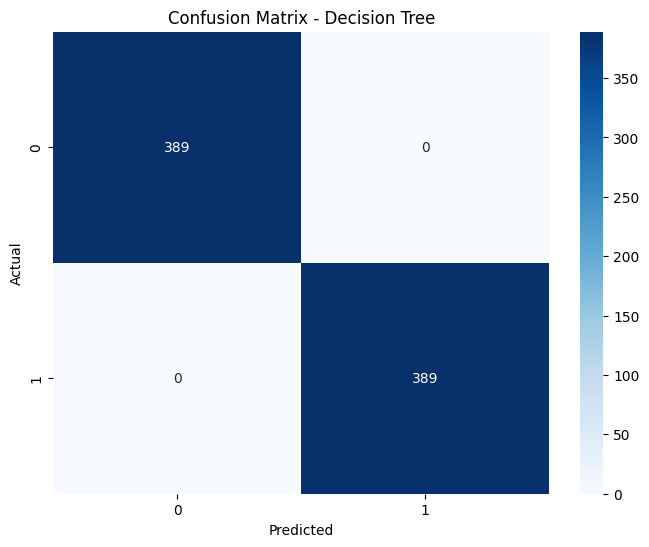

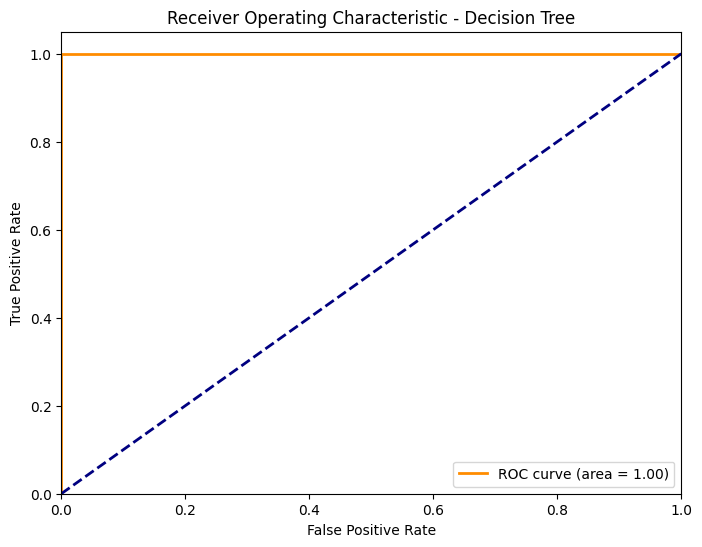


Model: Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       389

    accuracy                           1.00       778
   macro avg       1.00      1.00      1.00       778
weighted avg       1.00      1.00      1.00       778

Confusion Matrix:
 [[389   0]
 [  0 389]]


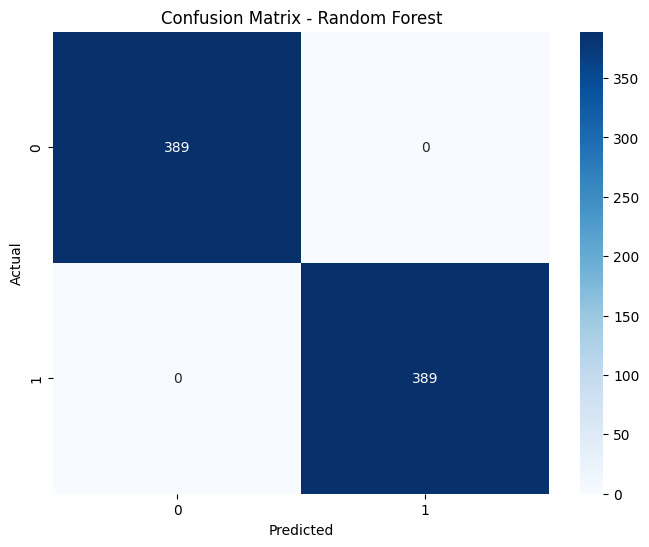

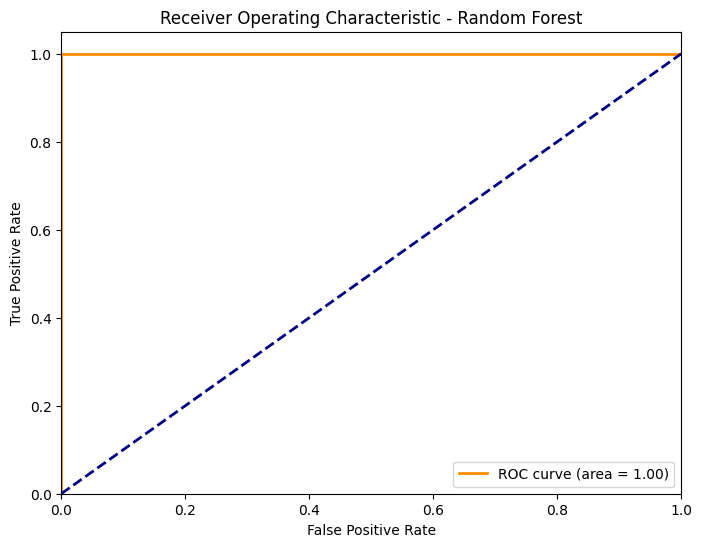


Model: Naive Bayes
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       389

    accuracy                           1.00       778
   macro avg       1.00      1.00      1.00       778
weighted avg       1.00      1.00      1.00       778

Confusion Matrix:
 [[389   0]
 [  0 389]]


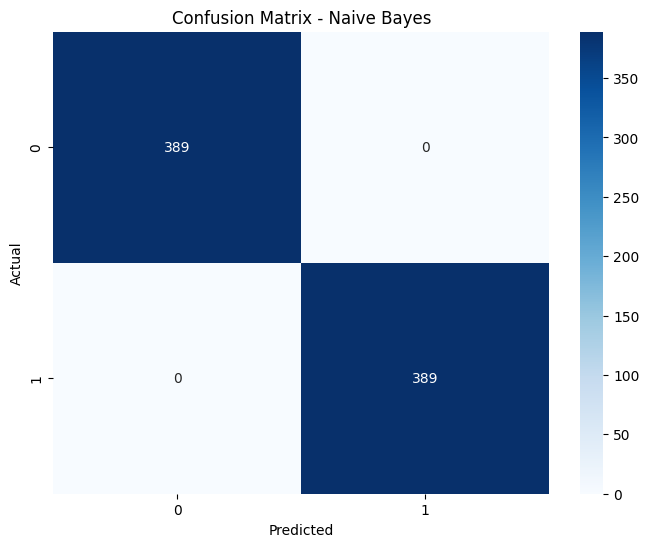

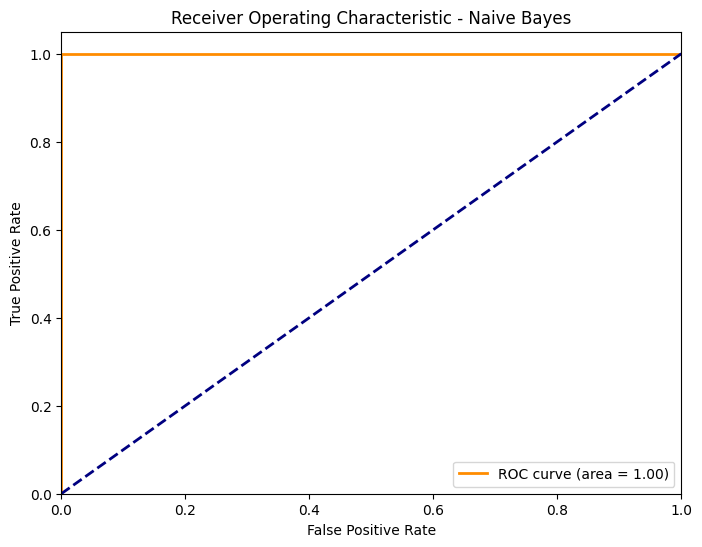


Model: SVM
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       389

    accuracy                           1.00       778
   macro avg       1.00      1.00      1.00       778
weighted avg       1.00      1.00      1.00       778

Confusion Matrix:
 [[389   0]
 [  0 389]]


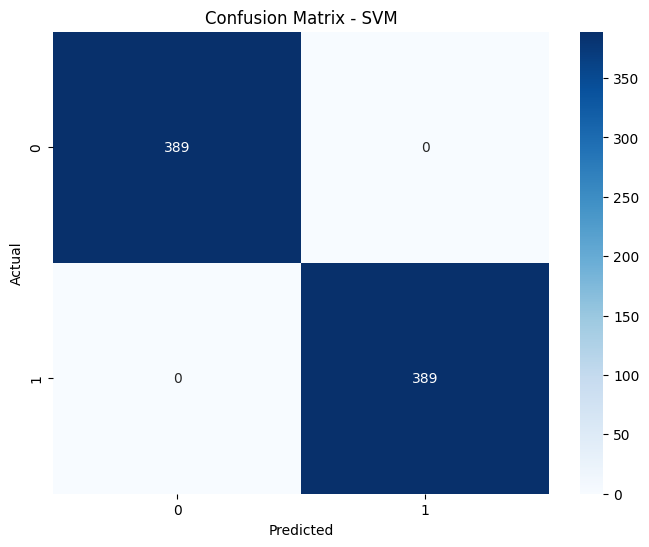

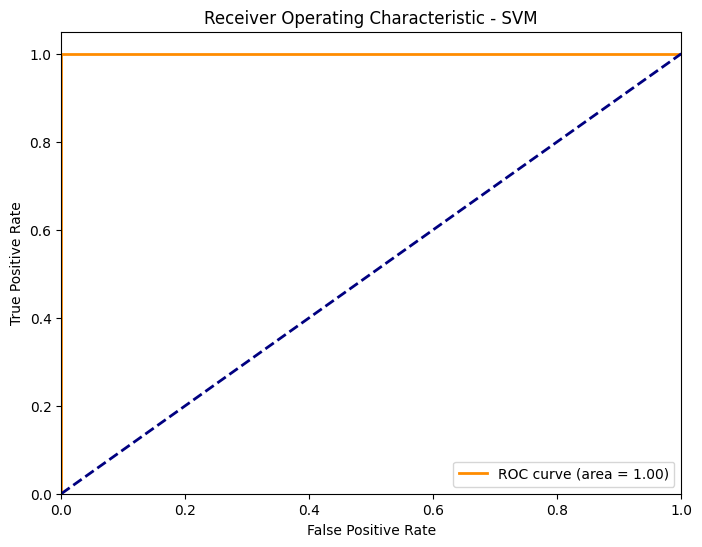


Model: KNN
Accuracy: 0.9023136246786633
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89       389
           1       0.84      1.00      0.91       389

    accuracy                           0.90       778
   macro avg       0.92      0.90      0.90       778
weighted avg       0.92      0.90      0.90       778

Confusion Matrix:
 [[313  76]
 [  0 389]]


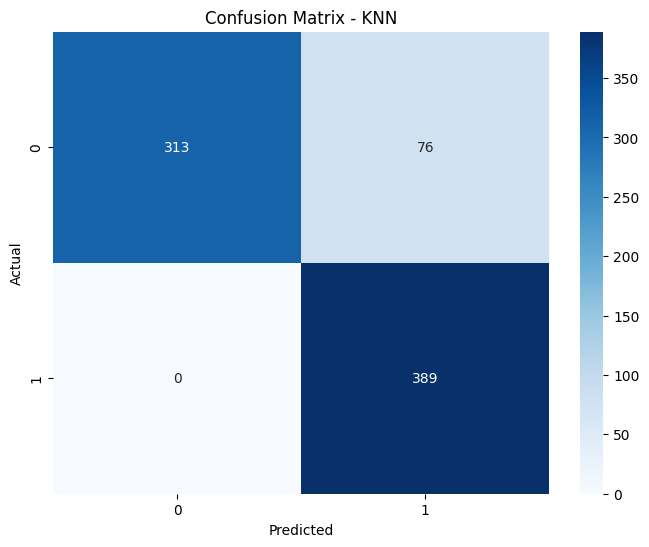

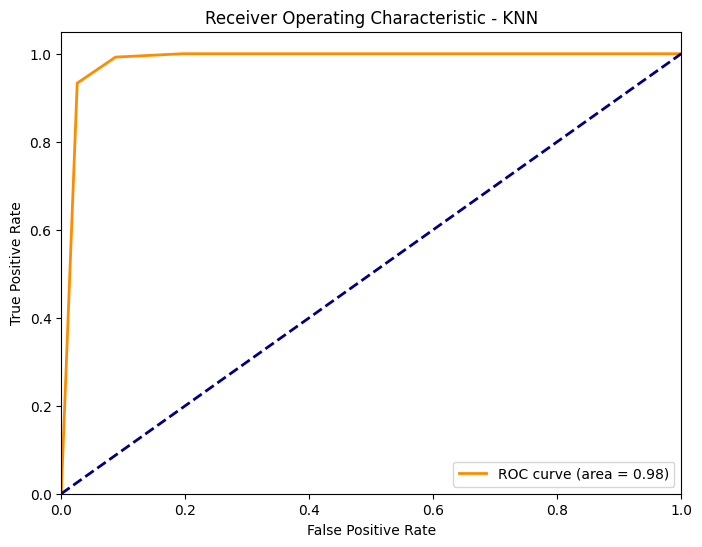

In [35]:
# Melakukan iterasi untuk setiap model dalam dictionary models
for model_name, model in models.items():
    # Melakukan prediksi menggunakan data test
    y_pred = model.predict(X_test)
    
    # Mencetak nama model yang sedang dievaluasi
    print(f"\nModel: {model_name}")
    
    # Menghitung dan mencetak accuracy score dengan membandingkan hasil prediksi dengan nilai sebenarnya
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    # Mencetak classification report yang berisi precision, recall, f1-score untuk setiap kelas
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Mencetak confusion matrix yang menunjukkan jumlah true positive, false positive, true negative, false negative
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # Membuat visualisasi confusion matrix dalam bentuk heatmap
    plot_confusion_matrix(y_test, y_pred, model_name)
    
    # Mengecek apakah model mendukung prediksi probabilitas
    if hasattr(model, "predict_proba"):
        # Jika model mendukung predict_proba, gunakan itu untuk mendapatkan probabilitas kelas positif
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        # Plot kurva ROC menggunakan probabilitas prediksi
        plot_roc_curve(y_test, y_pred_proba, model_name)
    elif model_name == 'SVM':  
        # Khusus untuk model SVM, gunakan decision_function untuk mendapatkan skor prediksi
        y_pred_proba = model.decision_function(X_test)
        # Plot kurva ROC menggunakan skor decision function
        plot_roc_curve(y_test, y_pred_proba, model_name)

In [36]:
# Evaluasi model Decision Tree
# Menghitung akurasi dengan membandingkan nilai prediksi dengan nilai sebenarnya
accuracy_dt = accuracy_score(y_test, y_pred_dt)
# Membuat laporan klasifikasi yang berisi precision, recall, f1-score untuk setiap kelas
classification_report_dt = classification_report(y_test, y_pred_dt)
# Membuat confusion matrix untuk melihat true positive, false positive, true negative, false negative
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Menampilkan hasil evaluasi Decision Tree
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", classification_report_dt)
print("Decision Tree Confusion Matrix:\n", confusion_matrix_dt)

# Evaluasi model Random Forest
# Menghitung akurasi Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
# Membuat laporan klasifikasi Random Forest
classification_report_rf = classification_report(y_test, y_pred_rf)
# Membuat confusion matrix Random Forest
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi Random Forest
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_report_rf)
print("Random Forest Confusion Matrix:\n", confusion_matrix_rf)

# Evaluasi model Naive Bayes
# Menghitung akurasi Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
# Membuat laporan klasifikasi Naive Bayes
classification_report_nb = classification_report(y_test, y_pred_nb)
# Membuat confusion matrix Naive Bayes
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Menampilkan hasil evaluasi Naive Bayes
print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Classification Report:\n", classification_report_nb)
print("Naive Bayes Confusion Matrix:\n", confusion_matrix_nb)

# Evaluasi model SVM (Support Vector Machine)
# Menghitung akurasi SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
# Membuat laporan klasifikasi SVM
classification_report_svm = classification_report(y_test, y_pred_svm)
# Membuat confusion matrix SVM
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Menampilkan hasil evaluasi SVM
print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", classification_report_svm)
print("SVM Confusion Matrix:\n", confusion_matrix_svm)

# Evaluasi model KNN (K-Nearest Neighbors)
# Menghitung akurasi KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
# Membuat laporan klasifikasi KNN
classification_report_knn = classification_report(y_test, y_pred_knn)
# Membuat confusion matrix KNN
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Menampilkan hasil evaluasi KNN
print("KNN Accuracy:", accuracy_knn)
print("KNN Classification Report:\n", classification_report_knn)
print("KNN Confusion Matrix:\n", confusion_matrix_knn)


Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       389

    accuracy                           1.00       778
   macro avg       1.00      1.00      1.00       778
weighted avg       1.00      1.00      1.00       778

Decision Tree Confusion Matrix:
 [[389   0]
 [  0 389]]
Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       389

    accuracy                           1.00       778
   macro avg       1.00      1.00      1.00       778
weighted avg       1.00      1.00      1.00       778

Random Forest Confusion Matrix:
 [[389   0]
 [  0 389]]
Naive Bayes Accuracy: 1.0
Naive Bayes Classification Report:
               precision    recall  f1-sc

In [37]:
# Membuat dictionary untuk menyimpan hasil evaluasi dari semua model
# Dictionary ini akan memudahkan dalam membandingkan performa antar model
model_performance = {
    # Menyimpan hasil evaluasi model Decision Tree
    'Decision Tree': {
        'Accuracy': accuracy_dt,                       # Nilai akurasi
        'Classification Report': classification_report_dt,  # Laporan klasifikasi detail
        'Confusion Matrix': confusion_matrix_dt        # Matrix konfusi
    },
    # Menyimpan hasil evaluasi model Random Forest 
    'Random Forest': {
        'Accuracy': accuracy_rf,
        'Classification Report': classification_report_rf,
        'Confusion Matrix': confusion_matrix_rf
    },
    # Menyimpan hasil evaluasi model Naive Bayes
    'Naive Bayes': {
        'Accuracy': accuracy_nb,
        'Classification Report': classification_report_nb,
        'Confusion Matrix': confusion_matrix_nb
    },
    # Menyimpan hasil evaluasi model SVM
    'SVM': {
        'Accuracy': accuracy_svm,
        'Classification Report': classification_report_svm,
        'Confusion Matrix': confusion_matrix_svm
    },
    # Menyimpan hasil evaluasi model KNN
    'KNN': {
        'Accuracy': accuracy_knn,
        'Classification Report': classification_report_knn,
        'Confusion Matrix': confusion_matrix_knn
    }
}

# Menampilkan hasil evaluasi untuk setiap model
# Loop melalui setiap model dalam dictionary
for model_name, performance in model_performance.items():
    print(f"\nModel: {model_name}")                                    # Nama model
    print(f"Accuracy: {performance['Accuracy']}")                      # Nilai akurasi model
    print("Classification Report:\n", performance['Classification Report'])  # Laporan klasifikasi detail
    print("Confusion Matrix:\n", performance['Confusion Matrix'])           # Matrix konfusi


Model: Decision Tree
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       389

    accuracy                           1.00       778
   macro avg       1.00      1.00      1.00       778
weighted avg       1.00      1.00      1.00       778

Confusion Matrix:
 [[389   0]
 [  0 389]]

Model: Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       389

    accuracy                           1.00       778
   macro avg       1.00      1.00      1.00       778
weighted avg       1.00      1.00      1.00       778

Confusion Matrix:
 [[389   0]
 [  0 389]]

Model: Naive Bayes
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      

<p style="background-color:darkgrey; font-family:calibri; color:white; font-size:250%; text-align:center; border-radius:50px 50px; padding-top:10px; padding-bottom:10px;">6. Deployment</p>

In [38]:
# Import library joblib untuk menyimpan dan memuat model machine learning
import joblib

# Menyimpan model-model yang telah dilatih ke dalam file .pkl
# joblib.dump() digunakan untuk menyimpan model ke dalam file
# Parameter pertama adalah model yang akan disimpan
# Parameter kedua adalah nama file untuk menyimpan model

# Menyimpan model Decision Tree ke file decision_tree_model.pkl
joblib.dump(dt_model, 'decision_tree_model.pkl')

# Menyimpan model Random Forest ke file random_forest_model.pkl 
joblib.dump(rf_model, 'random_forest_model.pkl')

# Menyimpan model Naive Bayes ke file naive_bayes_model.pkl
joblib.dump(nb_model, 'naive_bayes_model.pkl')

# Menyimpan model Support Vector Machine ke file svm_model.pkl
joblib.dump(svm_model, 'svm_model.pkl')

# Menyimpan model K-Nearest Neighbors ke file knn_model.pkl
joblib.dump(knn_model, 'knn_model.pkl')

['knn_model.pkl']

In [39]:
# Memuat kembali model-model yang telah disimpan sebelumnya menggunakan joblib.load()

# Memuat model Decision Tree dari file decision_tree_model.pkl
# Model ini akan digunakan untuk melakukan prediksi klasifikasi COVID-19
loaded_dt_model = joblib.load('decision_tree_model.pkl')

# Memuat model Random Forest dari file random_forest_model.pkl
# Model ini menggunakan kumpulan decision tree untuk prediksi yang lebih akurat
loaded_rf_model = joblib.load('random_forest_model.pkl')

# Memuat model Naive Bayes dari file naive_bayes_model.pkl
# Model probabilistik yang menggunakan teorema Bayes untuk klasifikasi
loaded_nb_model = joblib.load('naive_bayes_model.pkl')

# Memuat model Support Vector Machine dari file svm_model.pkl
# Model yang mencari hyperplane terbaik untuk memisahkan kelas-kelas
loaded_svm_model = joblib.load('svm_model.pkl')

# Memuat model K-Nearest Neighbors dari file knn_model.pkl
# Model yang melakukan klasifikasi berdasarkan tetangga terdekat
loaded_knn_model = joblib.load('knn_model.pkl')

In [40]:
# Membuat data baru untuk pengujian prediksi
# Mengambil baris pertama dari data test (X_test) sebagai contoh data
# to_frame().T digunakan untuk mengubah series menjadi dataframe dan melakukan transpose
new_data = X_test.iloc[0].to_frame().T

# Melakukan prediksi menggunakan model-model yang telah dimuat sebelumnya
# Setiap model akan memberikan prediksi berdasarkan data baru yang diberikan
prediction_dt = loaded_dt_model.predict(new_data)    # Prediksi menggunakan Decision Tree
prediction_rf = loaded_rf_model.predict(new_data)    # Prediksi menggunakan Random Forest  
prediction_nb = loaded_nb_model.predict(new_data)    # Prediksi menggunakan Naive Bayes
prediction_svm = loaded_svm_model.predict(new_data)  # Prediksi menggunakan Support Vector Machine
prediction_knn = loaded_knn_model.predict(new_data)  # Prediksi menggunakan K-Nearest Neighbors

# Menampilkan hasil prediksi dari setiap model
# Jika hasil prediksi = 1 maka "Positif", jika tidak maka "Negatif"
# Menggunakan f-string dan ternary operator untuk format output
print(f"Decision Tree Prediction: {'Positif' if prediction_dt[0] == 1 else 'Negatif'}")   # Hasil prediksi Decision Tree
print(f"Random Forest Prediction: {'Positif' if prediction_rf[0] == 1 else 'Negatif'}")   # Hasil prediksi Random Forest
print(f"Naive Bayes Prediction: {'Positif' if prediction_nb[0] == 1 else 'Negatif'}")     # Hasil prediksi Naive Bayes
print(f"SVM Prediction: {'Positif' if prediction_svm[0] == 1 else 'Negatif'}")            # Hasil prediksi SVM
print(f"KNN Prediction: {'Positif' if prediction_knn[0] == 1 else 'Negatif'}")            # Hasil prediksi KNN

Decision Tree Prediction: Positif
Random Forest Prediction: Positif
Naive Bayes Prediction: Positif
SVM Prediction: Positif
KNN Prediction: Positif
